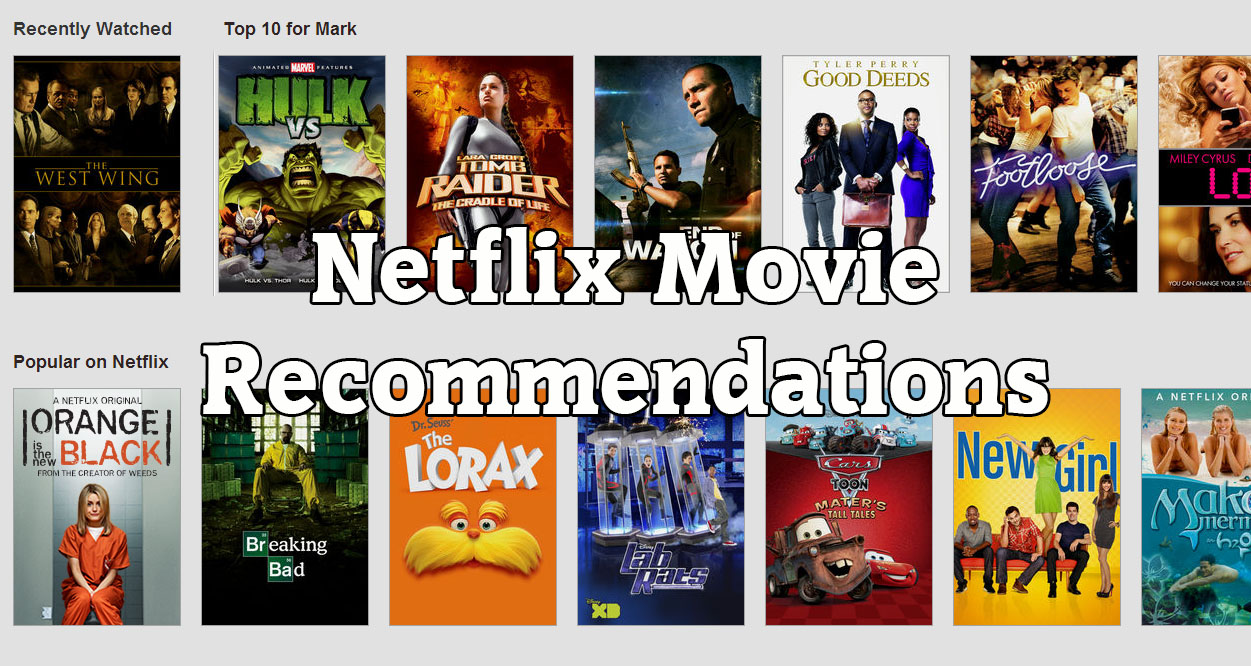

<h1>1. Business Problem </h1>

<h2> 1.1 Problem Description </h2>

<p>
Netflix is all about connecting people to the movies they love. To help customers find those movies, they developed world-class movie recommendation system: CinematchSM. Its job is to predict whether someone will enjoy a movie based on how much they liked or disliked other movies. Netflix use those predictions to make personal movie recommendations based on each customer’s unique tastes. And while <b>Cinematch</b> is doing pretty well, it can always be made better.
</p>
<p>Now there are a lot of interesting alternative approaches to how Cinematch works that netflix haven’t tried. Some are described in the literature, some aren’t. We’re curious whether any of these can beat Cinematch by making better predictions. Because, frankly, if there is a much better approach it could make a big difference to our customers and our business.</p>
<p> Credits: https://www.netflixprize.com/rules.html </p>

<h2> 1.2 Problem Statement </h2>

<p>
Netflix provided a lot of anonymous rating data, and a prediction accuracy bar that is 10% better than what Cinematch can do on the same training data set. (Accuracy is a measurement of how closely predicted ratings of movies match subsequent actual ratings.) 
</p>

<h2> 1.3 Sources </h2>

<ul>
<li> https://www.netflixprize.com/rules.html</li>
<li> https://www.kaggle.com/netflix-inc/netflix-prize-data</li>
<li> Netflix blog: https://medium.com/netflix-techblog/netflix-recommendations-beyond-the-5-stars-part-1-55838468f429 (very nice blog)</li>
<li>surprise library: http://surpriselib.com/ (we use many models from this library)</li>
<li>surprise library doc: http://surprise.readthedocs.io/en/stable/getting_started.html (we use many models from this library)</li>
<li>installing surprise: https://github.com/NicolasHug/Surprise#installation </li>
<li> Research paper: http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf (most of our work was inspired by this paper)</li>
<li> SVD Decomposition : https://www.youtube.com/watch?v=P5mlg91as1c </li>
</ul>

<h2>1.4 Real world/Business Objectives and constraints  </h2>

Objectives:
1. Predict the rating that a user would give to a movie that he ahs not yet rated.
2. Minimize the difference between predicted and actual rating (RMSE and MAPE)
<br>

Constraints:
1. Some form of interpretability.

<h1> 2. Machine Learning Problem </h1>

<h2>2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

<p> Get the data from : https://www.kaggle.com/netflix-inc/netflix-prize-data/data </p>
<p> Data files : 
<ul> 
<li> combined_data_1.txt </li>
<li> combined_data_2.txt </li>
<li> combined_data_3.txt </li>
<li> combined_data_4.txt </li>
<li> movie_titles.csv </li>
</ul>
<pre>  
The first line of each file [combined_data_1.txt, combined_data_2.txt, combined_data_3.txt, combined_data_4.txt] contains the movie id followed by a colon. Each subsequent line in the file corresponds to a rating from a customer and its date in the following format:

CustomerID,Rating,Date

MovieIDs range from 1 to 17770 sequentially.
CustomerIDs range from 1 to 2649429, with gaps. There are 480189 users.
Ratings are on a five star (integral) scale from 1 to 5.
Dates have the format YYYY-MM-DD.
</pre>

<h3> 2.1.2 Example Data point </h3>

<pre>
1:
1488844,3,2005-09-06
822109,5,2005-05-13
885013,4,2005-10-19
30878,4,2005-12-26
823519,3,2004-05-03
893988,3,2005-11-17
124105,4,2004-08-05
1248029,3,2004-04-22
1842128,4,2004-05-09
2238063,3,2005-05-11
1503895,4,2005-05-19
2207774,5,2005-06-06
2590061,3,2004-08-12
2442,3,2004-04-14
543865,4,2004-05-28
1209119,4,2004-03-23
804919,4,2004-06-10
1086807,3,2004-12-28
1711859,4,2005-05-08
372233,5,2005-11-23
1080361,3,2005-03-28
1245640,3,2005-12-19
558634,4,2004-12-14
2165002,4,2004-04-06
1181550,3,2004-02-01
1227322,4,2004-02-06
427928,4,2004-02-26
814701,5,2005-09-29
808731,4,2005-10-31
662870,5,2005-08-24
337541,5,2005-03-23
786312,3,2004-11-16
1133214,4,2004-03-07
1537427,4,2004-03-29
1209954,5,2005-05-09
2381599,3,2005-09-12
525356,2,2004-07-11
1910569,4,2004-04-12
2263586,4,2004-08-20
2421815,2,2004-02-26
1009622,1,2005-01-19
1481961,2,2005-05-24
401047,4,2005-06-03
2179073,3,2004-08-29
1434636,3,2004-05-01
93986,5,2005-10-06
1308744,5,2005-10-29
2647871,4,2005-12-30
1905581,5,2005-08-16
2508819,3,2004-05-18
1578279,1,2005-05-19
1159695,4,2005-02-15
2588432,3,2005-03-31
2423091,3,2005-09-12
470232,4,2004-04-08
2148699,2,2004-06-05
1342007,3,2004-07-16
466135,4,2004-07-13
2472440,3,2005-08-13
1283744,3,2004-04-17
1927580,4,2004-11-08
716874,5,2005-05-06
4326,4,2005-10-29
</pre>

<h2>2.2 Mapping the real world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<pre>
For a given movie and user we need to predict the rating would be given by him/her to the movie. 
The given problem is a Recommendation problem 
It can also seen as a Regression problem 
</pre>

<h3> 2.2.2 Performance metric </h3>

<ul>
<li> Mean Absolute Percentage Error: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error </li>
<li> Root Mean Square Error: https://en.wikipedia.org/wiki/Root-mean-square_deviation </li>
</ul>


<h3> 2.2.3 Machine Learning Objective and Constraints </h3>

1. Minimize RMSE.
2. Try to provide some interpretability.

In [1]:
# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime
globalstart = datetime.now()
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.use('nbagg')

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Preprocessing</h2> 

<h3>3.1.1 Converting / Merging whole data to required format: u_i, m_j, r_ij</h3>

In [2]:
!cp -r '/content/drive/My Drive/data_folder'  '/content/'

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
start = datetime.now()
if not os.path.isfile('data.csv'):
    data =  open('data.csv','w')
    files = ['data_folder/combined_data_1.txt','data_folder/combined_data_2.txt', 
           'data_folder/combined_data_3.txt', 'data_folder/combined_data_4.txt']
    for file in file:
        print("Reading ratings from {}...".format(file))
        with open(file,'r') as ff :
            for line in ff:
                line = line.strip()
                if line.endswith(':'):
                    movie_id = line.replace(':','')
                else:
                    row = [x for x in line.split()]
                    row.insert(0,movie_id)
                    data.write(','.join(row))
                    data.write('\n')
    print("Done!!") 
    data.close()            

print('Time taken :', datetime.now() - start)

Time taken : 0:00:00.001037


#### **Creating our data set**

In [4]:
print('Creating a dataframe from data.csv.........')
rating_dataset =  pd.read_csv('data.csv',sep=',',names=['movie', 'user','rating','date'])

Creating a dataframe from data.csv.........


In [5]:
rating_dataset.head(5)

,movie,user,rating,date
0,1,1488844,3,2005-09-06
1,1,822109,5,2005-05-13
2,1,885013,4,2005-10-19
3,1,30878,4,2005-12-26
4,1,823519,3,2004-05-03


In [6]:
rating_dataset.describe()['rating']

count    1.004805e+08
mean     3.604290e+00
std      1.085219e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

#### **checking for nan values**

In [7]:
print('Number of nan values in our dataframe is ',sum(rating_dataset.isnull().any()))

Number of nan values in our dataframe is  0


#### **checking for duplicates values**

In [8]:
dup_bool = rating_dataset.duplicated(['movie','user','rating'])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print('Number of duplicate entries in dataframe {}'.format(dups))

Number of duplicate entries in dataframe 0


#### **Basic statistics on user,movie and ratings data**

In [9]:
print('Total number of points in dataset is ',len(rating_dataset))
print('Total number of unique users is',len(rating_dataset.user.unique()))
print('Total number of unique movies is',len(rating_dataset.movie.unique()))

Total number of points in dataset is  100480507
Total number of unique users is 480189
Total number of unique movies is 17770


#### **Train and Test split (80:20)**

In [10]:
print('Sorting the dataset before split')
rating_dataset.sort_values('date',inplace=True)
print('Data Sorted!!')


Sorting the dataset before split
Data Sorted!!


In [11]:
## after sorting the dataset we split 80-10
if not os.path.isfile('data_folder/train.csv'):
    # create the dataframe and store it in the disk for offline purposes.
    rating_dataset.iloc[:int(rating_dataset.shape[0]*0.80)].to_csv("data_folder/train.csv", index=False)

if not os.path.isfile('data_folder/test.csv'):
    # create the dataframe and store it in the disk for offline purposes.
    rating_dataset.iloc[int(rating_dataset.shape[0]*0.80):].to_csv("data_folder/test.csv", index=False)

train_df = pd.read_csv("data_folder/train.csv", parse_dates=['date'])
test_df = pd.read_csv("data_folder/test.csv")

<h3>3.2.1 Basic Statistics in Train data (#Ratings, #Users, and #Movies)</h3>

In [12]:
# movies = train_df.movie.value_counts()
# users = train_df.user.value_counts()
print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",train_df.shape[0])
print("Total No of Users   :", len(np.unique(train_df.user)))
print("Total No of movies  :", len(np.unique(train_df.movie)))

Training data 
--------------------------------------------------

Total no of ratings : 80384405
Total No of Users   : 405041
Total No of movies  : 17424


<h3>3.2.2 Basic Statistics in Test data (#Ratings, #Users, and #Movies)</h3>

In [13]:
print("Test data ")
print("-"*50)
print("\nTotal no of ratings :",test_df.shape[0])
print("Total No of Users   :", len(np.unique(test_df.user)))
print("Total No of movies  :", len(np.unique(test_df.movie)))

Test data 
--------------------------------------------------

Total no of ratings : 20096102
Total No of Users   : 349312
Total No of movies  : 17757


 <h2> 3.3 Exploratory Data Analysis on Train data </h2>

In [14]:
## to make y axis more readable 

def human(num,units='M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"

    

<h3> 3.3.1 Distribution of ratings </h3>

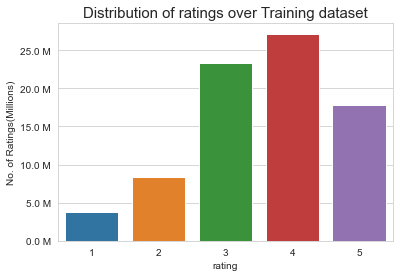

In [15]:
%matplotlib inline
fig, ax = plt.subplots()
sns.countplot(train_df['rating'])
plt.title('Distribution of ratings over Training dataset', fontsize=15)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')
plt.show()

<p style="font-size:13px"> <b>Add new column (week day) to the data set  for analysis.</b></p>

In [16]:
train_df['day_of_week'] = train_df.date.dt.weekday
def day_of_week(x):
    if    x==0:return 'Monday';
    elif  x==1:return 'Tuesday';
    elif  x==2:return 'Wednesday';
    elif  x==3:return 'Thursday';
    elif  x==4:return 'Friday';
    elif  x==5:return 'Saturday';
    elif  x==6:return 'Sunday'
train_df['day_of_week'] =  list(map(day_of_week,train_df['day_of_week'].values))
train_df.tail()

,movie,user,rating,date,day_of_week
80384400,12074,2033618,4,2005-08-08,Monday
80384401,862,1797061,3,2005-08-08,Monday
80384402,10986,1498715,5,2005-08-08,Monday
80384403,14861,500016,4,2005-08-08,Monday
80384404,5926,1044015,5,2005-08-08,Monday


Text(0.5, 0, 'Weekday')

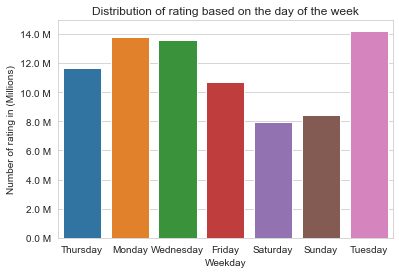

In [17]:
fig,ax=plt.subplots()
plt.title('Distribution of rating based on the day of the week')
sns.countplot(x=train_df.day_of_week,data=train_df)
ax.set_yticklabels([human(x,'M') for x in ax.get_yticks()])
ax.set_ylabel('Number of rating in (Millions)')
ax.set_xlabel('Weekday')

Text(0.5, 0, 'Weekday')

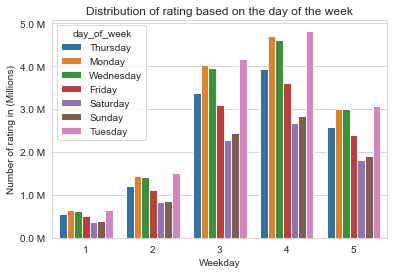

In [18]:
fig,ax=plt.subplots()
plt.title('Distribution of rating based on the day of the week')
sns.countplot(x=train_df.rating,hue='day_of_week',data=train_df)
ax.set_yticklabels([human(x,'M') for x in ax.get_yticks()])
ax.set_ylabel('Number of rating in (Millions)')
ax.set_xlabel('Weekday')

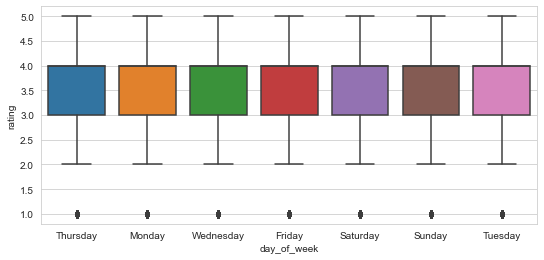

0:00:20.183114


In [19]:
start = datetime.now()
fig = plt.figure(figsize=plt.figaspect(.45))
sns.boxplot(y='rating', x='day_of_week', data=train_df)
plt.show()
print(datetime.now() - start)

In [20]:
avg_week_df = train_df.groupby(by=['day_of_week'])['rating'].mean()
print(" AVerage ratings")
print("-"*30)
print(avg_week_df)
print("\n")

 AVerage ratings
------------------------------
day_of_week
Friday       3.585274
Monday       3.577250
Saturday     3.591791
Sunday       3.594144
Thursday     3.582463
Tuesday      3.574438
Wednesday    3.583751
Name: rating, dtype: float64




<p style="font-size:13px"> <b>Add new column (Month) to the data set  for analysis.</b></p>

In [21]:
train_df['Month'] = train_df.date.dt.month_name()
train_df.head(5)

,movie,user,rating,date,day_of_week,Month
0,10341,510180,4,1999-11-11,Thursday,November
1,1798,510180,5,1999-11-11,Thursday,November
2,10774,510180,3,1999-11-11,Thursday,November
3,8651,510180,2,1999-11-11,Thursday,November
4,14660,510180,2,1999-11-11,Thursday,November


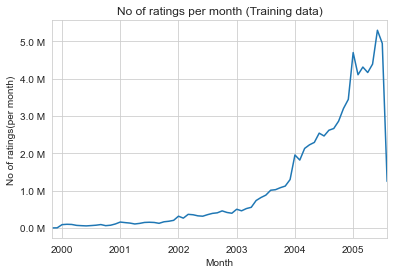

In [22]:
ax = train_df.resample('m', on='date')['rating'].count().plot()
ax.set_title('No of ratings per month (Training data)')
plt.xlabel('Month')
plt.ylabel('No of ratings(per month)')
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
plt.show()

Text(0, 0.5, 'Month')

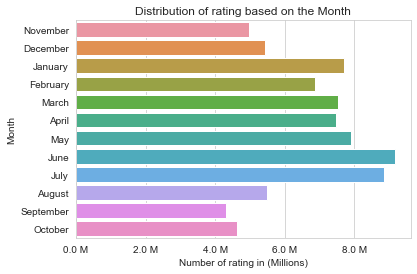

In [23]:
fig,ax=plt.subplots()
plt.title('Distribution of rating based on the Month')
sns.countplot(y=train_df.Month,data=train_df)
ax.set_xticklabels([human(x,'M') for x in ax.get_xticks()])
ax.set_xlabel('Number of rating in (Millions)')
ax.set_ylabel('Month')

#### Number of ratings given by each user

In [24]:
ratings_per_user = train_df.groupby('user')['rating'].count()
ratings_per_user.head(10)

user
6     436
7     852
10    201
25      4
33     33
42    118
59    156
79    759
83     31
87    112
Name: rating, dtype: int64

Text(0, 0.5, 'CDF')

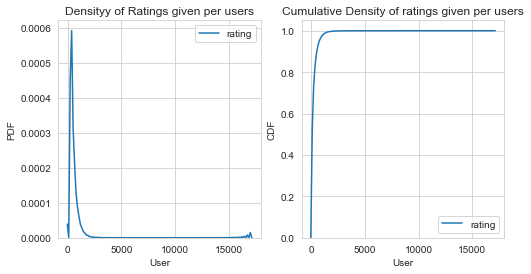

In [25]:
fig = plt.figure(figsize=plt.figaspect(.5))
plt.subplot(1,2,1)
sns.kdeplot(ratings_per_user)
plt.title('Densityy of Ratings given per users')
plt.xlabel('User')
plt.ylabel('PDF')

plt.subplot(1,2,2)
sns.kdeplot(ratings_per_user,cumulative=True)
plt.title('Cumulative Density of ratings given per users')
plt.xlabel('User')
plt.ylabel('CDF')

In [26]:
ratings_per_user.describe()

count    405041.000000
mean        198.459921
std         290.793238
min           1.000000
25%          34.000000
50%          89.000000
75%         245.000000
max       17112.000000
Name: rating, dtype: float64

 <i>We see a sudden spike in number of ratings given by user after 75th percentile ,Lets zoom in</i>

In [27]:
quantiles = ratings_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

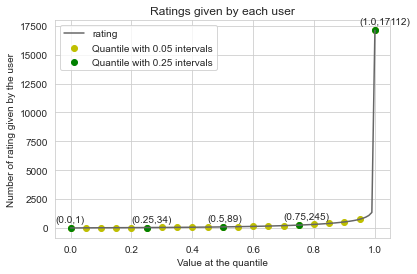

In [28]:
plt.scatter(x=quantiles.index[::5],y=quantiles.values[::5],c='y',label='Quantile with 0.05 intervals')
# quantiles with 0.25 difference
quantiles.plot(colormap='Dark2_r')
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='g', label = "Quantile with 0.25 intervals")
plt.title("Ratings given by each user")
plt.xlabel('Value at the quantile')
plt.ylabel('Number of rating given by the user')
plt.legend()

for x,y in zip(quantiles.index[::25],quantiles.values[::25]):
    plt.annotate('({},{})'.format(x,y),xy=(x,y),xytext=(x-0.05, y+500))

In [29]:
quantiles[::5]

0.00        1
0.05        7
0.10       15
0.15       21
0.20       27
0.25       34
0.30       41
0.35       50
0.40       60
0.45       73
0.50       89
0.55      109
0.60      133
0.65      163
0.70      199
0.75      245
0.80      307
0.85      392
0.90      520
0.95      749
1.00    17112
Name: rating, dtype: int64

<i>Number of ratings given in the last 5% quantile</i>

In [30]:
print('The number of ratings given by last 5% are:',sum(ratings_per_user>749))

The number of ratings given by last 5% are: 20242


#### Number of ratings given for each Movie

In [31]:
ratings_per_movie = train_df.groupby('movie')['rating'].count().sort_values(ascending=False)
ratings_per_movie.head(10)

movie
5317     179684
15124    176811
1905     160062
6287     155787
14313    153899
15205    144876
15582    143648
16377    140545
11283    137504
12470    133844
Name: rating, dtype: int64

Text(0, 0.5, 'CDF')

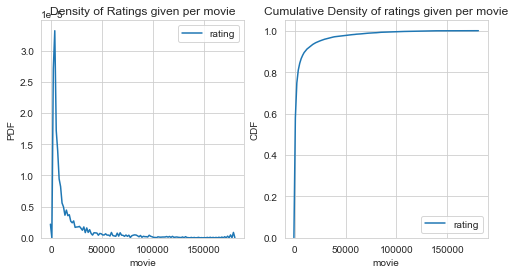

In [32]:
fig = plt.figure(figsize=plt.figaspect(.5))
plt.subplot(1,2,1)
sns.kdeplot(ratings_per_movie)
plt.title('Density of Ratings given per movie')
plt.xlabel('movie')
plt.ylabel('PDF')

plt.subplot(1,2,2)
sns.kdeplot(ratings_per_movie,cumulative=True)
plt.title('Cumulative Density of ratings given per movie')
plt.xlabel('movie')
plt.ylabel('CDF')

In [33]:
df =  pd.read_csv('data_folder/movie_titles.csv', header = None,sep=',',
                names=['movie_id', 'year_of_release', 'title'],index_col='movie_id',verbose=True, encoding = "ISO-8859-1")
#df.set_index('movie_id')

Tokenization took: 2.94 ms
Type conversion took: 7.02 ms
Parser memory cleanup took: 0.00 ms


In [34]:
df.head(2)

,year_of_release,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review


- TOP __10 movies__ that was most rated by

In [36]:
df = pd.merge(rating_dataset,df,left_on='movie',right_on='movie_id')

In [37]:
### top 10 rated movies
top_10_rated = df.groupby('title')['movie'].agg({'count'}).sort_values(by='count',ascending=False)[:10]

In [38]:
top_10_rated.head(3)

,count
title,
Miss Congeniality,232944
Independence Day,216596
The Patriot,211764


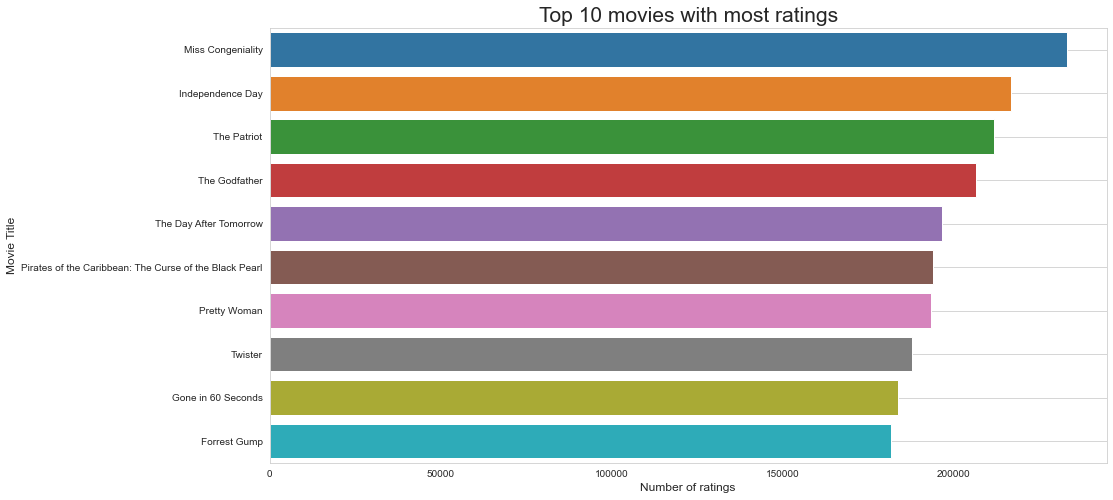

In [39]:
total_users=len(df.user.unique())
plt.figure(figsize=(15, 8))
Small = {'fontsize':12}
Medium = {'fontsize':21}
plt.title('Top 10 movies with most ratings',fontdict=Medium)
bar_plot = sns.barplot(x=top_10_rated['count'],y=top_10_rated.index)
plt.xlabel('Number of ratings',fontdict=Small)
plt.ylabel('Movie Title',fontdict=Small)
plt.grid()

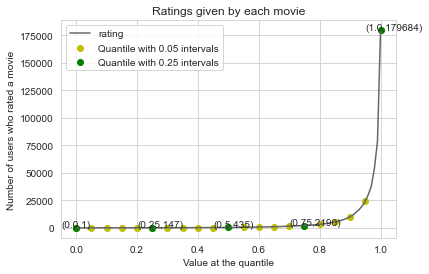

In [40]:
quantiles = ratings_per_movie.quantile(np.arange(0,1.01,0.01), interpolation='higher')

plt.scatter(x=quantiles.index[::5],y=quantiles.values[::5],c='y',label='Quantile with 0.05 intervals')
# quantiles with 0.25 difference
quantiles.plot(colormap='Dark2_r')
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='g', label = "Quantile with 0.25 intervals")
plt.title("Ratings given by each movie")
plt.xlabel('Value at the quantile')
plt.ylabel('Number of users who rated a movie')
plt.legend()

for x,y in zip(quantiles.index[::25],quantiles.values[::25]):
    plt.annotate('({},{})'.format(x,y),xy=(x,y),xytext=(x-0.05, y+500))

In [41]:
quantiles[::5]

0.00         1
0.05        63
0.10        87
0.15       105
0.20       124
0.25       147
0.30       178
0.35       217
0.40       271
0.45       342
0.50       435
0.55       577
0.60       784
0.65      1086
0.70      1574
0.75      2190
0.80      3296
0.85      5478
0.90     10139
0.95     24454
1.00    179684
Name: rating, dtype: int64

<i>How many ratings in the last 5% of all ratings </i>

In [42]:
print('Number of rated Movies which are in the last 5% quantiles',sum(ratings_per_movie>24454))

Number of rated Movies which are in the last 5% quantiles 871


- __It is very skewed.. just like number of ratings given per user.__
    
    
    - There are some movies (which are very popular) which are rated by huge number of users.
    
    - But most of the movies(like 90%) got some 10k ratings.

<h3> 3.3.6 Creating sparse matrix from data frame </h3>

<table>
<tr>
<td>
<img src='data_folder/images/data_c.jpg' width='250px' align=left/>
</td>
<td>
<img src='data_folder/images/arrow.jpg' width='60px' align=left/>
</td>
<td>
<img src='data_folder/images/data_sparse_c.jpg' width='400px' align=left/>
</td>
</tr>
</table>

In [43]:
## creating sparse matrix means creating a matrix where for every movie and user there is a 
### rating available in the matrix form
start = datetime.now()
if os.path.isfile('train_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    train_sparse_matrix = sparse.load_npz('train_sparse_matrix.npz')
    print("DONE..")
else:
    print('We are creating sparse matrix from the dataframe')
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values,(train_df.user.values,train_df.movie.values)),)
    print('Done. It\'s shape is : (user, movie) : ',train_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("train_sparse_matrix.npz", train_sparse_matrix)
    print('Done..\n')
    
print(datetime.now() - start)    

It is present in your pwd, getting it from disk....
DONE..
0:00:03.385875


<p><b>The Sparsity of Train Sparse Matrix</b></p>

In [44]:
us,mv = train_sparse_matrix.shape
non_zeros = train_sparse_matrix.count_nonzero()
print('The sparsity on the matrix is: ', (1-(non_zeros/(us*mv))) * 100,'%')

The sparsity on the matrix is:  99.8292709259195 %


<h4> 3.3.6.2 Creating sparse matrix from test data frame </h4>

In [45]:
start = datetime.now()
if os.path.isfile('test_sparse_matrix.npz'):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    test_sparse_matrix = sparse.load_npz('test_sparse_matrix.npz')
    print("DONE..")
else: 
    print("We are creating sparse_matrix from the dataframe..")
    # create sparse_matrix and store it for after usage.
    # csr_matrix(data_values, (row_index, col_index), shape_of_matrix)
    # It should be in such a way that, MATRIX[row, col] = data
    test_sparse_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.user.values,
                                               test_df.movie.values)))
    
    print('Done. It\'s shape is : (user, movie) : ',test_sparse_matrix.shape)
    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz("test_sparse_matrix.npz", test_sparse_matrix)
    print('Done..\n')
    
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.894730


<p><b>The Sparsity of Test data Matrix</b></p>

In [46]:
us,mv = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Test matrix : 99.95731772988694 % 


In [47]:
def get_average_rating(sparse_matrix,of_user):
    ax = 1 if of_user else 0
    sum_ = sparse_matrix.sum(axis=ax).A1
    is_rated = sparse_matrix!=0
    total_ratings = is_rated.sum(axis=ax).A1
    u,v = sparse_matrix.shape
    avg_rating = {i: sum_[i]/total_ratings[i] for i in range(u if of_user else v) if total_ratings[i]!=0}
    return avg_rating

<h4> 3.3.7.1 finding global average of all movie ratings </h4>

In [48]:
train_averages = dict()
# get the global average of ratings in our train set.
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 3.582890686321557}

<h4> 3.3.7.2 finding average rating per user</h4>

In [49]:
train_averages['user'] = get_average_rating(train_sparse_matrix,True)
print('The average rating of user 10 is: ',train_averages['user'][10])

The average rating of user 10 is:  3.3781094527363185


<h4> 3.3.7.3 finding average rating per movie</h4>

In [50]:
train_averages['movie'] = get_average_rating(train_sparse_matrix,False)
print('The average rating of movie 12: ',train_averages['movie'][12])

The average rating of movie 12:  3.3790849673202614


<h4> 3.3.7.4 PDF's & CDF's of Avg.Ratings of Users & Movies (In Train Data)</h4>

Text(0.5, 0, 'Movie')

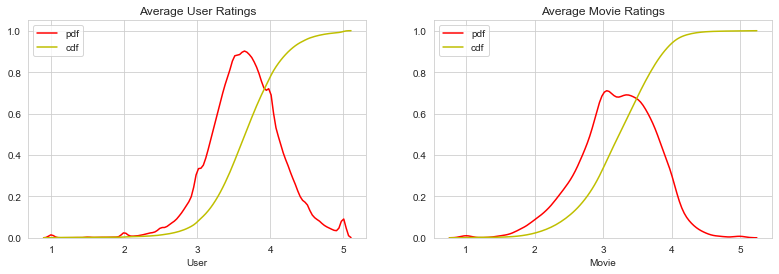

In [51]:
fig = plt.figure(figsize=plt.figaspect(.3))
plt.title('Average ratings per User and per Movie')
plt.subplot(1,2,1)
plt.title('Average User Ratings')
sns.kdeplot(list(train_averages['user'].values()),color='r',label='pdf')
sns.kdeplot(list(train_averages['user'].values()),cumulative=True,color='y',label='cdf')
plt.xlabel('User')
plt.subplot(1,2,2)
plt.title('Average Movie Ratings')
sns.kdeplot(list(train_averages['movie'].values()),color='r',label='pdf')
sns.kdeplot(list(train_averages['movie'].values()),cumulative=True,color='y',label='cdf')
plt.xlabel('Movie')

<h3> 3.3.8 Cold Start problem </h3>

<h4> 3.3.8.1 Cold Start problem with Users</h4>

In [52]:
total_users = len(np.unique(df.user))
users_train = len(train_averages['user'])
new_users = total_users - users_train

print('\nTotal number of Users  :', total_users)
print('\nNumber of Users in Train data :', users_train)
print("\nNo of Users that didn't appear in train data: {}({} %) \n ".format(new_users,np.round((new_users/total_users)*100, 2)))


Total number of Users  : 480189

Number of Users in Train data : 405041

No of Users that didn't appear in train data: 75148(15.65 %) 
 


> We might have to handle __new users__ ( ___75148___ ) who didn't appear in train data.

<h4> 3.3.8.2 Cold Start problem with Movies</h4>

In [53]:
tot_movie = len(rating_dataset.movie.unique())
movie_in_train = len(train_averages['movie'])
new_movies = tot_movie - movie_in_train
print('Percentage of new movie in train data {}({}%)'.format(new_movies,(new_movies/tot_movie)*100))

Percentage of new movie in train data 346(1.9471018570624647%)


> We might have to handle __346 movies__ (small comparatively) in test data


In [53]:
from sklearn.metrics.pairwise import cosine_similarity


def compute_user_similarity(sparse_matrix, compute_for_few=False, top = 100, verbose=False, verb_for_n_rows = 20,
                            draw_time_taken=True):
    no_of_users, _ = sparse_matrix.shape
    # get the indices of  non zero rows(users) from our sparse matrix
    row_ind, col_ind = sparse_matrix.nonzero()
    row_ind = sorted(set(row_ind)) # we don't have to
    time_taken = list() #  time taken for finding similar users for an user..
    
    # we create rows, cols, and data lists.., which can be used to create sparse matrices
    rows, cols, data = list(), list(), list()
    if verbose: print("Computing top",top,"similarities for each user..")
    
    start = datetime.now()
    temp = 0
    
    for row in row_ind[:top] if compute_for_few else row_ind:
        temp = temp+1
        prev = datetime.now()
        
        # get the similarity row for this user with all other users
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()
        # We will get only the top ''top'' most similar users and ignore rest of them..
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]
        
        # add them to our rows, cols and data
        rows.extend([row]*top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        time_taken.append(datetime.now().timestamp() - prev.timestamp())
        if verbose:
            if temp%verb_for_n_rows == 0:
                print("computing done for {} users [  time elapsed : {}  ]"
                      .format(temp, datetime.now()-start))
            
        
    # lets create sparse matrix out of these and return it
    if verbose: print('Creating Sparse matrix from the computed similarities')
    #return rows, cols, data

    if draw_time_taken:
        plt.plot(time_taken, label = 'time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (seconds)')
        plt.show()
        
    return sparse.csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users)), time_taken      

In [ ]:
start = datetime.now()
u_u_sim_sparse, _ = compute_user_similarity(train_sparse_matrix, compute_for_few=True, top = 100,
                                                     verbose=True)
print("-"*100)
print("Time taken :",datetime.now()-start)

<h4> 3.4.1.2 Trying with reduced dimensions (Using TruncatedSVD for dimensionality reduction of user vector)</h4>

 

* We have  **405,041 users** in out training set and computing similarities between them..( **17K dimensional vector..**) is time consuming..


- From above plot, It took roughly __8.88 sec__ for computing simlilar users for __one user__
    
    
- We have __405,041 users__ with us in training set.


- ${ 405041 \times 8.88 = 3596764.08  \sec } =  59946.068 \min = 999.101133333 \text{ hours}
= 41.629213889 \text{ days}...$

    - Even if we run on 4 cores parallelly (a typical system now a days), It will still take almost __10 and 1/2__ days.
    
 IDEA:  Instead, we will try to reduce the dimentsions using SVD, so that __it might__ speed up the process...

In [ ]:
from datetime import datetime
from sklearn.decomposition import TruncatedSVD

start = datetime.now()

# initilaize the algorithm with some parameters..
# All of them are default except n_components. n_itr is for Randomized SVD solver.
netflix_svd = TruncatedSVD(n_components=500, algorithm='randomized', random_state=15)
trunc_svd = netflix_svd.fit_transform(train_sparse_matrix)

print(datetime.now()-start)

Here,


- $\sum \longleftarrow$ (netflix\_svd.**singular\_values\_** )


- $\bigvee^T \longleftarrow$ (netflix\_svd.**components_**)


- $\bigcup$ is not returned. instead **Projection_of_X** onto the new vectorspace is returned. 


- It uses **randomized svd** internally, which returns **All 3 of them saperately**. Use that instead.. 

In [ ]:
expl_var = np.cumsum(netflix_svd.explained_variance_ratio_)

<IPython.core.display.Javascript object>


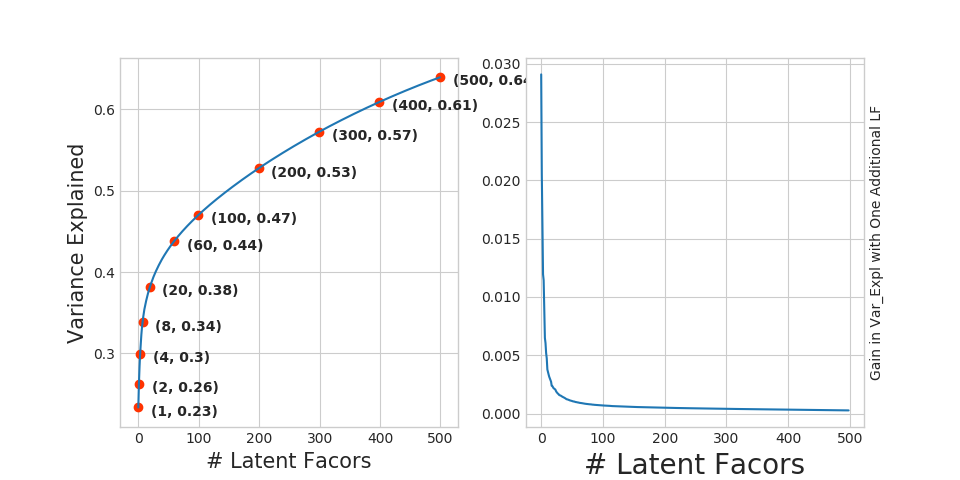

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(.5))

ax1.set_ylabel("Variance Explained", fontsize=15)
ax1.set_xlabel("# Latent Facors", fontsize=15)
ax1.plot(expl_var)
# annote some (latentfactors, expl_var) to make it clear
ind = [1, 2,4,8,20, 60, 100, 200, 300, 400, 500]
ax1.scatter(x = [i-1 for i in ind], y = expl_var[[i-1 for i in ind]], c='#ff3300')
for i in ind:
    ax1.annotate(s ="({}, {})".format(i,np.round(expl_var[i-1], 2)), xy=(i-1, expl_var[i-1]),
                xytext = ( i+20, expl_var[i-1] - 0.01), fontweight='bold')

change_in_expl_var = [expl_var[i+1] - expl_var[i] for i in range(len(expl_var)-1)]
ax2.plot(change_in_expl_var)

ax2.set_ylabel("Gain in Var_Expl with One Additional LF", fontsize=10)
ax2.yaxis.set_label_position("right")
ax2.set_xlabel("# Latent Facors", fontsize=20)
plt.show()

In [ ]:
for i in ind:
    print("({}, {})".format(i, np.round(expl_var[i-1], 2)))

 
> I think 500 dimensions is good enough 

---------

-  By just taking __(20 to 30)__ latent factors, explained variance that we could get is __20 %__. 

- To take it to __60%__, we have to take  __almost 400 latent factors__. It is not fare.



- It basically is the __gain of variance explained__, if we ___add one additional latent factor to it.___


- By adding one by one latent factore too it, the ___gain in expained variance__ with that addition is decreasing. (Obviously, because they are sorted that way).
- ___LHS Graph___:
    - __x__ --- ( No of latent factos ),
    - __y__ --- ( The variance explained by taking x latent factors)



- __More decrease in the line (RHS graph) __:
    - We  are getting more expained variance than before.
- __Less decrease in that line (RHS graph)__  :
    - We are not getting benifitted from adding latent factor furthur. This is what is shown in the plots.


- ___RHS Graph___:
    - __x__ --- ( No of latent factors ),
    - __y__ --- ( Gain n Expl_Var by taking one additional latent factor) 

In [ ]:
# Let's project our Original U_M matrix into into 500 Dimensional space...
start = datetime.now()
trunc_matrix = train_sparse_matrix.dot(netflix_svd.components_.T)
print(datetime.now()- start)

0:00:45.670265


In [ ]:
type(trunc_matrix), trunc_matrix.shape

(numpy.ndarray, (2649430, 500))

* Let's convert this to actual sparse matrix and store it for future purposes

In [56]:
if not os.path.isfile('trunc_sparse_matrix.npz'):
    # create that sparse sparse matrix
    trunc_sparse_matrix = sparse.csr_matrix(trunc_matrix)
    # Save this truncated sparse matrix for later usage..
    sparse.save_npz('trunc_sparse_matrix', trunc_sparse_matrix)
else:
    trunc_sparse_matrix = sparse.load_npz('trunc_sparse_matrix.npz')

In [57]:
trunc_sparse_matrix.shape

(2649430, 500)

In [ ]:
start = datetime.now()
trunc_u_u_sim_matrix, _ = compute_user_similarity(trunc_sparse_matrix, compute_for_few=True, top=50, verbose=True, 
                                                 verb_for_n_rows=10)
print("-"*50)
print("time:",datetime.now()-start)

**: This is taking more time for each user than Original one.**

- from above plot, It took almost __12.18__ for computing simlilar users for __one user__
    
    
- We have __405041 users__ with us in training set.


- ${ 405041 \times 12.18 ==== 4933399.38 \sec } ====  82223.323 \min ==== 1370.388716667 \text{ hours}
==== 57.099529861 \text{ days}...$

    - Even we run on 4 cores parallelly (a typical system now a days), It will still take almost __(14 - 15) __ days.


- __Why did this happen...??__


    - Just think about it. It's not that difficult.

---------------------------------_( sparse & dense..................get it ?? )_-----------------------------------

__Is there any other way to compute user user similarity..??__

-An alternative is to compute similar users for a particular user,  whenenver required (**ie., Run time**)
    - We maintain a binary Vector for users, which tells us whether we already computed or not..
    - ***If not*** : 
        - Compute top (let's just say, 1000) most similar users for this given user, and add this to our datastructure, so that we can just access it(similar users) without recomputing it again.
        - 
    - ***If It is already Computed***:
        - Just get it directly from our datastructure, which has that information.
        - In production time, We might have to recompute similarities, if it is computed a long time ago. Because user preferences changes over time. If we could maintain some kind of Timer, which when expires, we have to update it ( recompute it ). 
        - 
    - ***Which datastructure to use:***
        - It is purely implementation dependant. 
        - One simple method is to maintain a **Dictionary Of Dictionaries**.
            - 
            - **key    :** _userid_ 
            - __value__: _Again a dictionary_
                - __key__  : _Similar User_
                - __value__: _Similarity Value_

<h3> 3.4.2 Computing Movie-Movie Similarity matrix </h3>

In [54]:
start = datetime.now()
if not os.path.isfile('data_folder/m_m_sim_sparse.npz'):
    print("It seems you don't have that file. Computing movie_movie similarity...")
    start = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=train_sparse_matrix.T, dense_output=False)
    print("Done..")
    # store this sparse matrix in disk before using it. For future purposes.
    print("Saving it to disk without the need of re-computing it again.. ")
    sparse.save_npz("m_m_sim_sparse.npz", m_m_sim_sparse)
    print("Done..")
else:
    print("It is there, We will get it.")
    m_m_sim_sparse = sparse.load_npz("data_folder/m_m_sim_sparse.npz")
    print("Done ...")

print("It's a ",m_m_sim_sparse.shape," dimensional matrix")
print(datetime.now() - start)

It is there, We will get it.
Done ...
It's a  (17771, 17771)  dimensional matrix
0:00:24.185423


In [88]:
m_m_sim_sparse.shape

(17771, 17771)

- Even though we have similarity measure of each movie, with all other movies, We generally don't care much about least similar movies.


- Most of the times, only top_xxx similar items matters. It may be 10 or 100.


- We take only those top similar movie ratings and store them  in a saperate dictionary.

In [55]:
movie_ids = np.unique(m_m_sim_sparse.nonzero()[1])

In [56]:
start = datetime.now()
similar_movies = dict()
for movie in movie_ids:
    # get the top similar movies and store them in the dictionary
    sim_movies = m_m_sim_sparse[movie].toarray().ravel().argsort()[::-1][1:]
    similar_movies[movie] = sim_movies[:100]
print(datetime.now() - start)

# just testing similar movies for movie_15
similar_movies[15]

0:00:24.666983


array([ 8279,  8013, 16528,  5927, 13105, 12049,  4424, 10193, 17590,
        4549,  3755,   590, 14059, 15144, 15054,  9584,  9071,  6349,
       16402,  3973,  1720,  5370, 16309,  9376,  6116,  4706,  2818,
         778, 15331,  1416, 12979, 17139, 17710,  5452,  2534,   164,
       15188,  8323,  2450, 16331,  9566, 15301, 13213, 14308, 15984,
       10597,  6426,  5500,  7068,  7328,  5720,  9802,   376, 13013,
        8003, 10199,  3338, 15390,  9688, 16455, 11730,  4513,   598,
       12762,  2187,   509,  5865,  9166, 17115, 16334,  1942,  7282,
       17584,  4376,  8988,  8873,  5921,  2716, 14679, 11947, 11981,
        4649,   565, 12954, 10788, 10220, 10963,  9427,  1690,  5107,
        7859,  5969,  1510,  2429,   847,  7845,  6410, 13931,  9840,
        3706], dtype=int64)

<h3> 3.4.3 Finding most similar movies using similarity matrix </h3>

__ Does Similarity really works as the way we expected...? __ <br>
_Let's pick some random movie and check for its similar movies...._

In [57]:
mv_id = 67
top_100 = m_m_sim_sparse[67].toarray().ravel().argsort()[-100:]

In [58]:
df =  pd.read_csv('data_folder/movie_titles.csv', header = None,sep=',',
                names=['movie_id', 'year_of_release', 'title'],index_col='movie_id',verbose=True, encoding = "ISO-8859-1")
#df.set_index('movie_id')

Tokenization took: 2.99 ms
Type conversion took: 11.01 ms
Parser memory cleanup took: 0.00 ms


In [59]:
df.loc[mv_id]

year_of_release                1997
title              Vampire Journals
Name: 67, dtype: object

In [60]:
print('Movie name is:',df.loc[mv_id]['title'])
print('Number of ratings given for this movie is: ',train_sparse_matrix[:,mv_id].count_nonzero())
print('Total similar movies to this movie is: ',m_m_sim_sparse[:,mv_id].count_nonzero())

Movie name is: Vampire Journals
Number of ratings given for this movie is:  270
Total similar movies to this movie is:  17284


### top 10 similar movies


In [61]:
sim_ind_10 = m_m_sim_sparse[:,mv_id].toarray().ravel().argsort()[-11:][:10]

In [62]:
df.loc[sim_ind_10]

,year_of_release,title
movie_id,,
15867,2003.0,Dracula II: Ascension
13873,2001.0,The Breed
1900,1997.0,Club Vampire
4667,1996.0,Vampirella
16279,2002.0,Vampires: Los Muertos
12053,1993.0,Dracula Rising
13962,2001.0,Dracula: The Dark Prince
1688,1993.0,To Sleep With a Vampire
4044,1998.0,Subspecies 4: Bloodstorm


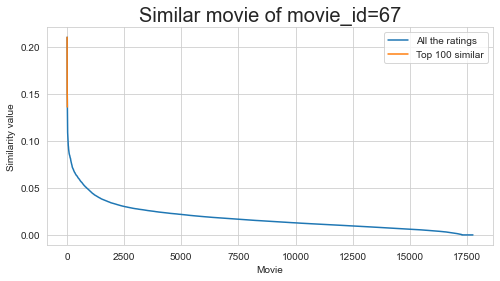

In [63]:
### Plot the similar matrices
fig= plt.figure(figsize=plt.figaspect(.5))
idx=m_m_sim_sparse[:,mv_id].toarray().ravel().argsort()[::-1][1:]
idx_100 = m_m_sim_sparse[:,mv_id].toarray().ravel().argsort()[::-1][1:11] 
idx_val=m_m_sim_sparse[:,mv_id][idx].toarray().ravel()
idx_val_100 = m_m_sim_sparse[:,mv_id][idx_100].toarray().ravel()
plt.plot(idx_val,label='All the ratings')
plt.plot(idx_val_100,label='Top 100 similar')
plt.title("Similar movie of movie_id=67",fontdict={'fontsize':20})
plt.xlabel('Movie')
plt.ylabel('Similarity value')
plt.legend()

<h3> 3.4.3 Finding most similar Users using similarity matrix </h3>

__ Does Similarity really works as the way we expected...? __ <br>
_Let's pick some random movie and check for its similar users...._

In [64]:
## compute cosine similarity for user 6
u_id = 6
sim_u = cosine_similarity(train_sparse_matrix[u_id],train_sparse_matrix)

In [65]:
sim_u =sim_u[0]
sortd_idx_100 = sim_u.argsort()[::-1][1:101]

In [66]:
print('User id is:',u_id)
print('Number of ratings given by this user is: ',train_sparse_matrix[u_id].count_nonzero())
print('Total similar users to this user is: ',len(sim_u.nonzero()[0]))

User id is: 6
Number of ratings given by this user is:  436
Total similar users to this user is:  392995


In [67]:
train_sparse_matrix[6].toarray().ravel()

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### top 10 similar users


_how to test if these users are similar ? <br>
_based on the rating they have given to movies <br>
_types of movies watched
 

In [68]:
pd.set_option('max_rows',700)
sortd_idx_100 = sim_u.argsort()[::-1][1:101]

In [69]:
d = train_df[train_df['user'].isin(sortd_idx_100)].merge(df,left_on='movie',right_on='movie_id')

In [70]:
#d['avg_rating']  = 
x = train_df.groupby(by=['user']).agg([('Avg','mean')])['rating']
d = pd.merge(x,d,right_on='user',left_on=x.index,how='inner')

In [71]:
d[d['title'] == 'The Sixth Sense'].head(12)

,Avg,movie,user,rating,date,day_of_week,Month,year_of_release,title
47,3.186755,4306,11826,3,2004-06-02,Wednesday,June,1999.0,The Sixth Sense
790,3.703774,4306,14936,4,2004-08-31,Tuesday,August,1999.0,The Sixth Sense
1326,4.059322,4306,25606,5,2005-05-17,Tuesday,May,1999.0,The Sixth Sense
1905,4.148387,4306,32240,4,2005-02-09,Wednesday,February,1999.0,The Sixth Sense
2536,3.407295,4306,112428,5,2005-04-03,Sunday,April,1999.0,The Sixth Sense
3196,3.840223,4306,123665,5,2004-08-29,Sunday,August,1999.0,The Sixth Sense
4095,3.155125,4306,125275,4,2004-06-09,Wednesday,June,1999.0,The Sixth Sense
5153,3.888545,4306,139269,5,2004-11-25,Thursday,November,1999.0,The Sixth Sense
5497,3.581935,4306,188790,5,2004-06-02,Wednesday,June,1999.0,The Sixth Sense
6264,3.381620,4306,207080,4,2005-04-09,Saturday,April,1999.0,The Sixth Sense


* We see that the average rating given by the top 10 similar users are very close 
* For the movie 6th sense these users had given similar rating of 4-5 

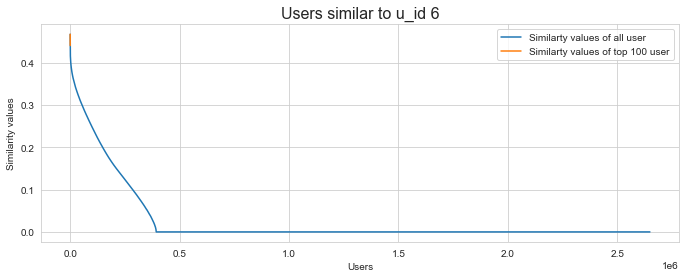

In [72]:
fig = plt.figure(figsize=plt.figaspect(.35))
users = d.drop_duplicates(['user'],keep='first')
plt.plot(sim_u[sim_u.argsort()[::-1][1:]],label='Similarty values of all user')
plt.plot(sim_u[sim_u.argsort()[::-1][1:101]],label='Similarty values of top 100 user')
plt.xlabel('Users')
plt.ylabel('Similarity values')
plt.title('Users similar to u_id 6',fontdict={'fontsize':16})
plt.legend()

 <h1> 4.  Machine Learning Models </h1>

In [73]:
train_reg = pd.read_csv('reg_train.csv',names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
test_reg = pd.read_csv('reg_test.csv',names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)

In [74]:
def get_random_sparse_matrix(sparse_matrix,no_users,no_movies,verbose,path):
    row_ind,cols_ind,ratings = sparse.find(sparse_matrix)
    
#     prev_user = set(test_reg.user)
#     current_user = set(row_ind)
#     prev_movie = set(test_reg.movie)
#     current_movie = set(cols_ind)

#     users = np.unique(list(current_user - prev_user))
#     movies = np.unique(list(current_movie - prev_movie))
    users = np.unique(row_ind)
    movies = np.unique(cols_ind)
    
    ## random subset of users 
    np.random.seed(15)
    random_users = np.random.choice(users,no_users,replace=False)
    random_movies = np.random.choice(movies,no_movies,replace=False)
    
    ## masking 
    mask = np.logical_and(np.isin(row_ind,random_users),np.isin(cols_ind,random_movies))
    
    ## creating sample matrix
    random_sparse_matrix = sparse.csr_matrix((ratings[mask],(row_ind[mask],cols_ind[mask])),
                                      shape=(max(random_users)+1, max(random_movies)+1))
    
    if verbose:
        print("Sampled Matrix : (users, movies) -- ({} {})".format(len(random_users), len(random_movies)))
        print("Sampled Matrix : Ratings --", format(ratings[mask].shape[0]))

    print('Saving it into disk for furthur usage..')
    # save it into disk
    sparse.save_npz(path, random_sparse_matrix)
    if verbose:
            print('Done..\n')
    return random_sparse_matrix

<h2> 4.1 Sampling Data </h2>

<h3>4.1.1 Build sample train data from the train data</h3>

In [75]:
start = datetime.now()
path = "sample_train_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_train_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else: 
    # get 10k users and 1k movies from available data 
    print('Sampled data not present in pwd,creating the sparse matrix......')
    sample_train_sparse_matrix = get_random_sparse_matrix(train_sparse_matrix,no_users=25000, no_movies=3000,verbose=True,path=path)

print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.130006


<h3>4.1.2 Build sample test data from the test data</h3>

In [76]:
start = datetime.now()

path = "sample_test_sparse_matrix.npz"
if os.path.isfile(path):
    print("It is present in your pwd, getting it from disk....")
    # just get it from the disk instead of computing it
    sample_test_sparse_matrix = sparse.load_npz(path)
    print("DONE..")
else:
    # get 5k users and 500 movies from available data 
    sample_test_sparse_matrix = get_random_sparse_matrix(test_sparse_matrix, no_users=5000, no_movies=500,verbose=True,
                                                 path = path)
print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.050862


### 4.2 Finding Global Average of all movie ratings, Average rating per User, and Average rating per Movie (from sampled train)

In [77]:
sample_train_averages = dict()

In [78]:
# get the global average of ratings in our train set.
global_average = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_train_averages['global'] = global_average
sample_train_averages

{'global': 3.5875813607223455}

<h3>4.2.2 Finding Average rating per User</h3>

In [79]:
sample_train_averages['user'] = get_average_rating(sample_train_sparse_matrix, of_user=True)
print('\nAverage rating of user 1515220 :',sample_train_averages['user'][1515220])


Average rating of user 1515220 : 3.923076923076923


<h3>4.2.3 Finding Average rating per Movie</h3>

In [80]:
sample_train_averages['movie'] =  get_average_rating(sample_train_sparse_matrix, of_user=False)
print('\n AVerage rating of movie 15153 :',sample_train_averages['movie'][15153])


 AVerage rating of movie 15153 : 2.752


<h2> 4.3 Featurizing data </h2>

In [81]:
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(sample_train_sparse_matrix.count_nonzero()))
print('\n No of ratings in Our Sampled test  matrix is : {}\n'.format(sample_test_sparse_matrix.count_nonzero()))


 No of ratings in Our Sampled train matrix is : 856986


 No of ratings in Our Sampled test  matrix is : 7333



<h3> 4.3.1 Featurizing data for regression problem </h3>

<h4> 4.3.1.1 Featurizing train data </h4>

In [82]:
sample_train_users,sample_train_movies,sample_train_ratings = sparse.find(sample_train_sparse_matrix)

In [ ]:
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 ='sixth'

for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

def parallelprocess(zip_,path):
    count=0
    with open(path, mode='w') as reg_data_file:
        for (user, movie, rating) in zip_:
            st = datetime.now()
            # print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] 

            # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie

            top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()

            # we will make it's length "5" by adding movie averages to .

            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
            # print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"     

            movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] 

            # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..

            top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
            #print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(sample_train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(sample_train_averages['user'][user])
            # Avg_movie rating
            row.append(sample_train_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%10000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))


def firstprocess():
    zip_ = zip(sample_train_users[0:142831],sample_train_movies[0:142831],sample_train_ratings[0:142831])
    parallelprocess(zip_,'first/regtrain.csv')
                   
def secondprocess():
    zip_ = zip(sample_train_users[142831:285662],sample_train_movies[142831:285662],sample_train_ratings[142831:285662])
    parallelprocess(zip_,'second/regtrain.csv')           

def thirdprocess():
    zip_ = zip(sample_train_users[285662:428493],sample_train_movies[285662:428493],sample_train_ratings[285662:428493])
    parallelprocess(zip_,'third/regtrain.csv')  
                   
def fourthprocess():
    zip_ = zip(sample_train_users[428493:571324],sample_train_movies[428493:571324],sample_train_ratings[428493:571324])
    parallelprocess(zip_,'fourth/regtrain.csv')     

def fifthprocess():
    zip_ = zip(sample_train_users[571324:714155],sample_train_movies[571324:714155],sample_train_ratings[571324:714155])
    parallelprocess(zip_,'fifth/regtrain.csv')  
                   
def sixthprocess():
    zip_ = zip(sample_train_users[714155:856986],sample_train_movies[714155:856986],sample_train_ratings[714155:856986])
    parallelprocess(zip_,'sixth/regtrain.csv')                                       


In [ ]:
from multiprocessing import Process# this is used for multithreading
import multiprocessing
def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    p6=Process(target=sixthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    p6.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()
    p6.join()   
if __name__=="__main__":
    main()

In [83]:
### write a function to merge all the data after parallel processing 
d1 = pd.read_csv('first/regtrain.csv')
d2 = pd.read_csv('second/regtrain.csv')
d3 = pd.read_csv('third/regtrain.csv')
d4 = pd.read_csv('fourth/regtrain.csv')
d5 = pd.read_csv('fifth/regtrain.csv')
d6 = pd.read_csv('sixth/regtrain.csv')

In [84]:
train_sample_dataset = np.concatenate([d1.values,d2.values,d3.values,d4.values,d5.values,d6.values],axis=0)
train_sample_dataset = pd.DataFrame(data=train_sample_dataset,columns = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'])

In [85]:
## ref : https://stackoverflow.com/questions/24455615/python-how-to-display-size-of-all-variables
# from __future__ import print_function  # for Python2
# import sys

# local_vars = list(locals().items())
# for var, obj in local_vars:
#     print(var, sys.getsizeof(obj))

In [86]:
## to freeup ram space 
del d1,d2,d3,d4,d5,d6
del train_df,test_df
del ratings_per_movie,ratings_per_user
del dup_bool
del rating_dataset
del sample_train_users,sample_train_movies,sample_train_ratings

In [89]:
train_sample_dataset.head(5)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,233949.0,10.0,3.587581,4.0,4.0,5.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,2.692308,3.611111,3.0
1,555770.0,10.0,3.587581,4.0,5.0,4.0,4.0,5.0,4.0,2.0,5.0,4.0,4.0,3.795455,3.611111,4.0
2,767518.0,10.0,3.587581,2.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,3.0,3.884615,3.611111,5.0
3,894393.0,10.0,3.587581,3.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.000000,3.611111,4.0
4,951907.0,10.0,3.587581,4.0,5.0,3.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.881188,3.611111,4.0


__Reading from the file to make a test dataframe __

In [90]:
reg_test_df = pd.read_csv('reg_test.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_test_df.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4
2,1737912,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3
3,1849204,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4


-----------------------

- __GAvg__ : Average rating of all the ratings 


- __Similar users rating of this movie__:
    - sur1, sur2, sur3, sur4, sur5 ( top 5 simiular users who rated that movie.. )
    


- __Similar movies rated by this user__:
    - smr1, smr2, smr3, smr4, smr5 ( top 5 simiular movies rated by this movie.. )


- __UAvg__ : User AVerage rating


- __MAvg__ : Average rating of this movie


- __rating__ : Rating of this movie by this user.

-----------------------

<h3> 4.3.2 Transforming data for Surprise models</h3>

In [91]:
from surprise import Reader, Dataset

<h4> 4.3.2.1 Transforming train data </h4>

- We can't give raw data (movie, user, rating) to train the model in Surprise library.


- They have a saperate format for TRAIN and TEST data, which will be useful for training the models like SVD, KNNBaseLineOnly....etc..,in Surprise.


- We can form the trainset from a file, or from a Pandas  DataFrame. 
http://surprise.readthedocs.io/en/stable/getting_started.html#load-dom-dataframe-py 

In [92]:
reader =  Reader(rating_scale=(1,5))
train_sample_dataset['rating'] = train_sample_dataset['rating'].astype('float32')
train_sample_dataset['user'] = train_sample_dataset['user'].astype('float32')
train_sample_dataset['movie'] = train_sample_dataset['movie'].astype('float32')
train_data = Dataset.load_from_df(train_sample_dataset[['user','movie','rating']],reader)
trainset = train_data.build_full_trainset()

<h4> 4.3.2.2 Transforming test data </h4>

- Testset is just a list of (user, movie, rating) tuples. (Order in the tuple is impotant) 

In [93]:
testset = list(zip(reg_test_df.user.values, reg_test_df.movie.values, reg_test_df.rating.values))
testset[:3]

[(808635, 71, 5), (941866, 71, 4), (1737912, 71, 3)]

<h2> 4.4 Applying Machine Learning models </h2>

-  Global dictionary that stores rmse and mape for all the models....

    - It stores the metrics in a dictionary of dictionaries

    > __keys__ : model names(string)

    > __value__: dict(__key__ : metric, __value__ : value ) 

In [94]:
models_evaluation_train = dict()
models_evaluation_test = dict()
models_evaluation_train, models_evaluation_test

({}, {})

 > __Utility functions for running regression models__

In [95]:
def error_metrics(y_true,y_pred):
    rmse = np.sqrt(np.mean([(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]))
    mape = np.mean(np.abs((y_true - y_pred)/y_true)) * 100    
    return rmse,mape
def run_xgboost(algo,x_train,x_test,y_train,y_test,verbose=False):
    ''' Returns train and test results '''
    train_result = dict()
    test_result = dict()
    
    start = datetime.now()
    algo.fit(x_train,y_train,eval_metric = 'rmse')
    print('Time taken to train the model---- ',datetime.now() - start)
    
    ## evaluate the model on train
    train_pred = algo.predict(x_train)
    rmse_train ,mape_train = error_metrics(y_train,train_pred)
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : train_pred}
    
    ## evaluate the model on train
    test_pred = algo.predict(x_test)
    rmse_test ,mape_test = error_metrics(y_test,test_pred)
    # store the results in train_results dictionary..
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions' : test_pred}
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
      
    # return these train and test results...
    return train_results, test_results

> __Utility functions for Surprise modes__

In [96]:
def get_actual_predictions(predictions):
#     true_est = np.array([pred.r_ui,pred.est] for pred in predictions)
#     return true_est[:,0],true_est[:,1]
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    return actual, pred

def error_metrics(y_true,y_pred):
    rmse = np.sqrt(np.mean([(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]))
    mape = np.mean(np.abs((y_true - y_pred)/y_true))   
    return rmse,mape*100

def run_surprise(algo,trainset,testset,verbose=False,):
    train_result,test_result={},{}
    ''' To run the surprise model....... '''
    start = datetime.now()
    print('Training the models.....')
    algo.fit(trainset)
    print('Done !! Time taken is ',datetime.now() - start)
     
    #---------Evaluation train data---------------
    st=datetime.now()
    print('Evaluating model on train data')
    predictions = algo.test(trainset.build_testset())
    train_actual_rating,train_pred_rating = get_actual_predictions(predictions)
    train_rmse,train_mape = error_metrics(train_actual_rating,train_pred_rating)
    print('time taken : {}'.format(datetime.now()-st))
    train_results = {'rmse': train_rmse,
                    'mape' : train_mape,
                    'predictions' : train_pred_rating}
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    #-----------Evaluation test data ---------
    st=datetime.now()
    print('Evaluating model on test data')
    predictions = algo.test(testset)
    test_actual_rating,test_pred_rating = get_actual_predictions(predictions)
    test_rmse,test_mape = error_metrics(test_actual_rating,test_pred_rating)
    print('time taken : {}'.format(datetime.now()-st))
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    test_results = {'rmse': test_rmse,
                    'mape' : test_mape,
                    'predictions' : test_pred_rating}
    
    return train_results,test_results

<h3> 4.4.1 XGBoost with initial 13 features </h3>

In [97]:
import xgboost as xgb
import pickle
import os

### Hyperparameter Tuning XGB

In [98]:
## prepare train data and test data
x_train = train_sample_dataset.drop(['user','movie','rating'],axis=1)
x_test = reg_test_df.drop(['user','movie','rating'],axis=1)

## prepare y_train and y_test
y_train = train_sample_dataset['rating']
y_test = reg_test_df['rating']

In [99]:


## https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
params_tune_results=[]
print('There are total of 324 hyper parameter combinations!!')
cnt=0

if not os.path.isfile('13features.pkl'):
    for min_child_weight in params['min_child_weight'] :
        for gamma in params['gamma'] :
            for subsample in params['subsample']:
                for colsample_bytree in params['colsample_bytree']:
                    for max_depth in params['max_depth']:

                        strt = datetime.now()
                        ## initialize xgboost
                        xgb_ = xgb.XGBRegressor(silent=False,n_jobs=-1,random_state=15,nthread=-1,
                                               min_child_weight=min_child_weight,
                                               gamma=gamma,subsample=subsample,colsample_bytree=colsample_bytree,
                                               max_depth=max_depth)
                        train_results, test_results = run_xgboost(xgb_, x_train,x_test, y_train, y_test)

                        # store the results in models_evaluations dictionaries
                        models_evaluation_train['first_algo'] = train_results
                        models_evaluation_test['first_algo'] = test_results
                        cnt+=1
                        params_tune_results.append((min_child_weight,gamma,subsample,colsample_bytree,max_depth,
                                                    (models_evaluation_train['first_algo']['mape'],models_evaluation_train['first_algo']['rmse']),
                                                    (models_evaluation_test['first_algo']['mape'],models_evaluation_test['first_algo']['rmse'])))
                        print('End of combination{} of params training with train mape:'.format(cnt),
                                              models_evaluation_train['first_algo']['mape'],' ',
                                              'test mape',models_evaluation_test['first_algo']['mape'])
    with open('13features.pkl','wb') as f:
        pickle.dump([params_tune_results],f)
else:
    params_tune_results = pickle.load(open('13features.pkl','rb'))

There are total of 324 hyper parameter combinations!!


In [100]:
### finding the best params with least rmse 
params_13 = params_tune_results[0]
all_mape = [mape[1] for mape in  np.array(params_13)[:,6]]
sorted_idx = np.argsort(all_mape)

In [101]:
best_t_13 = {}
best_t_13['min_child_weight'] =  params_13[sorted_idx[0]][0]
best_t_13['gamma'] =  params_13[sorted_idx[0]][1]
best_t_13['subsample'] =  params_13[sorted_idx[0]][2]
best_t_13['colsample_bytree'] =  params_13[sorted_idx[0]][3]
best_t_13['max_depth'] =  params_13[sorted_idx[0]][4]

### Training with best hyperparameter 

In [102]:
xgb_ = xgb.XGBRegressor(silent=False,n_jobs=-1,random_state=15,nthread=-1,
                        min_child_weight=best_t_13['min_child_weight'],
                        gamma=best_t_13['gamma'],
                        subsample=best_t_13['subsample'],
                        colsample_bytree=best_t_13['colsample_bytree'],
                        max_depth=best_t_13['max_depth'])

In [103]:
train_results, test_results = run_xgboost(xgb_,x_train,x_test,y_train,y_test,True)   

[16:19:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to train the model----  0:00:14.023678

TEST DATA
------------------------------
RMSE :  1.0730293103937931
MAPE :  35.09698382913734


In [105]:
 models_evaluation_train['13features'] = train_results
models_evaluation_test['13features'] = test_results

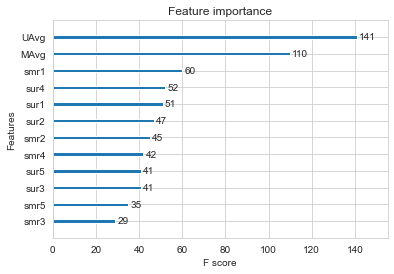

In [106]:
xgb.plot_importance(xgb_)
plt.show()

<h3> 4.4.2 Suprise BaselineModel </h3>
    


In [107]:
from surprise import BaselineOnly 

__Predicted_rating : ( baseline prediction ) __

    -  http://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly 
 >$   \large {\hat{r}_{ui} = b_{ui} =\mu + b_u + b_i} $


- $\pmb \mu $ : Average of all trainings in training data.
- $\pmb b_u$ : User bias
- $\pmb b_i$ : Item bias (movie biases) 

__Optimization function ( Least Squares Problem ) __

    - http://surprise.readthedocs.io/en/stable/prediction_algorithms.html#baselines-estimates-configuration 

> $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - (\mu + b_u + b_i)\right)^2 +
\lambda \left(b_u^2 + b_i^2 \right).\text {        [mimimize } {b_u, b_i]}$ 

In [108]:
# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'sgd','learning_rate': .001 }
bsl_algo = BaselineOnly(bsl_options=bsl_options)

# run this algorithm.., It will return the train and test results..
bsl_train_results,bsl_test_results = run_surprise(bsl_algo,trainset,testset,verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['bsl_algo'] = bsl_train_results 
models_evaluation_test['bsl_algo'] = bsl_test_results

Training the models.....
Estimating biases using sgd...
Done !! Time taken is  0:00:05.274205
Evaluating model on train data
time taken : 0:00:06.380219
---------------
Train Data
---------------
RMSE : 0.921382695993438

MAPE : 28.634786530854626

Evaluating model on test data
time taken : 0:00:00.235762
---------------
Test Data
---------------
RMSE : 1.0658752960527853

MAPE : 34.41268137985677



<h3> 4.4.3 XGBoost with initial 13 features + Surprise Baseline predictor </h3>

__Updating Train Data__

In [109]:
train_sample_dataset['bslpr'] = models_evaluation_train['bsl_algo']['predictions']
train_sample_dataset.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,233949.0,10.0,3.587581,4.0,4.0,5.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,2.692308,3.611111,3.0,3.209933
1,555770.0,10.0,3.587581,4.0,5.0,4.0,4.0,5.0,4.0,2.0,5.0,4.0,4.0,3.795455,3.611111,4.0,3.488397
2,767518.0,10.0,3.587581,2.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,3.0,3.884615,3.611111,5.0,3.403899
3,894393.0,10.0,3.587581,3.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.000000,3.611111,4.0,3.133889


__Updating Test Data__

In [110]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['bslpr']  = models_evaluation_test['bsl_algo']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.584119
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.584119


#### Hyperparameter Tuning for dataset with baseline predictions + 13 features

In [111]:
## prepare train data and test data
x_train = train_sample_dataset.drop(['user','movie','rating'],axis=1)
x_test = reg_test_df.drop(['user','movie','rating'],axis=1)

## prepare y_train and y_test
y_train = train_sample_dataset['rating']
y_test = reg_test_df['rating']

In [112]:


## https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
params = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
params_tune_results=[]
print('There are total of 324 hyper parameter combinations!!')
cnt=0

if not os.path.isfile('13&baseline_features.pkl'):
    for min_child_weight in params['min_child_weight'] :
        for gamma in params['gamma'] :
            for subsample in params['subsample']:
                for colsample_bytree in params['colsample_bytree']:
                    for max_depth in params['max_depth']:

                        strt = datetime.now()
                        ## initialize xgboost
                        xgb_ = xgb.XGBRegressor(silent=False,n_jobs=-1,random_state=15,nthread=-1,
                                               min_child_weight=min_child_weight,
                                               gamma=gamma,subsample=subsample,colsample_bytree=colsample_bytree,
                                               max_depth=max_depth)
                        train_results, test_results = run_xgboost(xgb_, x_train,x_test, y_train, y_test)

                        # store the results in models_evaluations dictionaries
                        models_evaluation_train['first_algo'] = train_results
                        models_evaluation_test['first_algo'] = test_results
                        cnt+=1
                        params_tune_results.append((min_child_weight,gamma,subsample,colsample_bytree,max_depth,
                                                    (models_evaluation_train['first_algo']['mape'],models_evaluation_train['first_algo']['rmse']),
                                                    (models_evaluation_test['first_algo']['mape'],models_evaluation_test['first_algo']['rmse'])))
                        print('End of combination{} of params training with train mape:'.format(cnt),
                                              models_evaluation_train['first_algo']['mape'],' ',
                                              'test mape',models_evaluation_test['first_algo']['mape'])
    with open('13&baseline_features.pkl','wb') as f:
        pickle.dump([params_tune_results],f)
else:
    params_tune_results = pickle.load(open('13&baseline_features.pkl','rb'))

There are total of 324 hyper parameter combinations!!


In [113]:
### finding the best params with least rmse 
params_13b = params_tune_results[0]
all_mape = [mape[1] for mape in  np.array(params_13b)[:,6]]
sorted_idx = np.argsort(all_mape)

best_t_13b = {}
best_t_13b['min_child_weight'] =  params_13b[sorted_idx[0]][0]
best_t_13b['gamma'] =  params_13b[sorted_idx[0]][1]
best_t_13b['subsample'] =  params_13b[sorted_idx[0]][2]
best_t_13b['colsample_bytree'] =  params_13b[sorted_idx[0]][3]
best_t_13b['max_depth'] =  params_13b[sorted_idx[0]][4]

[16:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to train the model----  0:00:13.358244

TEST DATA
------------------------------
RMSE :  1.0731231800139753
MAPE :  34.941053230863645


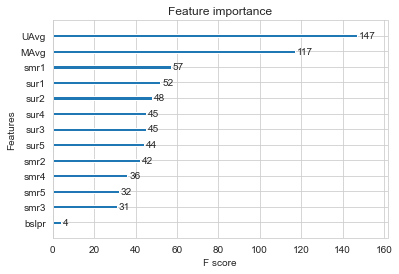

In [114]:
### Training with best hyperparameter 

xgb_ = xgb.XGBRegressor(silent=False,n_jobs=-1,random_state=15,nthread=-1,
                        min_child_weight=best_t_13b['min_child_weight'],
                        gamma=best_t_13b['gamma'],
                        subsample=best_t_13b['subsample'],
                        colsample_bytree=best_t_13b['colsample_bytree'],
                        max_depth=best_t_13b['max_depth'])

train_results, test_results = run_xgboost(xgb_,x_train,x_test,y_train,y_test,True)   
#Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['XG_13_bslalgo'] = train_results 
models_evaluation_test['XG_13_bslalgo'] = test_results
xgb.plot_importance(xgb_)
plt.show()

<h3> 4.4.4 Surprise KNNBaseline predictor </h3>

In [118]:
from surprise import KNNBaseline

- KNN BASELINE
    - http://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline 

- PEARSON_BASELINE SIMILARITY
    - http://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.pearson_baseline 

- SHRINKAGE
    - _2.2 Neighborhood Models_ in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf 

- __predicted Rating__ : ( ___ based on User-User similarity ___ )

\begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{v \in N^k_i(u)}
\text{sim}(u, v) \cdot (r_{vi} - b_{vi})} {\sum\limits_{v \in
N^k_i(u)} \text{sim}(u, v)} \end{align}

- $\pmb{b_{ui}}$ -  _Baseline prediction_ of (user,movie) rating

- $ \pmb {N_i^k (u)}$ - Set of __K similar__ users (neighbours) of __user (u)__ who rated __movie(i)__  

- _sim (u, v)_ - __Similarity__ between users __u and v__  
    - Generally, it will be cosine similarity or Pearson correlation coefficient. 
    - But we use __shrunk Pearson-baseline correlation coefficient__, which is based on the pearsonBaseline similarity ( we take base line predictions instead of mean rating of user/item)
       

- __ Predicted rating __ ( based on Item Item similarity ):
 \begin{align} \hat{r}_{ui} = b_{ui} + \frac{ \sum\limits_{j \in N^k_u(i)}\text{sim}(i, j) \cdot (r_{uj} - b_{uj})} {\sum\limits_{j \in N^k_u(j)} \text{sim}(i, j)} \end{align}

    -  ___Notations follows same as above (user user based predicted rating ) ___

  <h4> 4.4.4.1 Surprise KNNBaseline with user user similarities</h4>

In [ ]:
# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'sgd','learning_rate': .001 }
result = [] 
for s in [30,50,80,110]:
    for k in [20,40,80,100]:
        sim_options = {'user_based' : True,
                'name': 'pearson_baseline',
               'shrinkage': s,
               'min_support': 2
              }
        # we specify , how to compute similarities and what to consider with sim_options to our algorithm
        bsl_algo = KNNBaseline(k,sim_options = sim_options,bsl_options=bsl_options)
        # run this algorithm.., It will return the train and test results..
        bsl_train_results,bsl_test_results = run_surprise(bsl_algo,trainset,testset,verbose=True)
        result.append((s,k,bsl_train_results,bsl_test_results))
#         # Just store these error metrics in our models_evaluation datastructure
#         models_evaluation_train['bsl_algo'] = bsl_train_results 
#         models_evaluation_test['bsl_algo'] = bsl_test_results

In [123]:
# with open('knnresult.pkl','wb') as f:
#         pickle.dump([result],f)

In [119]:
 result = pickle.load(open('knnresult.pkl','rb'))

In [120]:
from operator import itemgetter
result = result[0]
test_values = list(map(itemgetter(3),result))
results_bestknn_tr = result[np.argmin(map(itemgetter(1),test_values))][2]['predictions']
results_bestknn_te = result[np.argmin(map(itemgetter(1),test_values))][3]['predictions']

In [121]:
#Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_u'] = result[np.argmin(map(itemgetter(1),test_values))][2]
models_evaluation_test['knn_u'] = result[np.argmin(map(itemgetter(1),test_values))][3]

__Updating Train Data__

In [122]:
train_sample_dataset['knnpr_u'] = results_bestknn_tr
train_sample_dataset.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knnpr_u
0,233949.0,10.0,3.587581,4.0,4.0,5.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,2.692308,3.611111,3.0,3.209933,2.936268
1,555770.0,10.0,3.587581,4.0,5.0,4.0,4.0,5.0,4.0,2.0,5.0,4.0,4.0,3.795455,3.611111,4.0,3.488397,2.295150
2,767518.0,10.0,3.587581,2.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,3.0,3.884615,3.611111,5.0,3.403899,2.847004
3,894393.0,10.0,3.587581,3.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.000000,3.611111,4.0,3.133889,2.965204


__Updating Test Data__

In [123]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['knnpr_u']  = results_bestknn_te

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knnpr_u
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.584119,3.584119
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.584119,3.584119


#### Hyperparameter tuning KNNBaseline with user-user similarities

In [124]:
## prepare train data and test data
x_train = train_sample_dataset.drop(['user','movie','rating'],axis=1)
x_test = reg_test_df.drop(['user','movie','rating'],axis=1)

## prepare y_train and y_test
y_train = train_sample_dataset['rating']
y_test = reg_test_df['rating']

In [125]:


## https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
params = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
params_tune_results=[]
cnt=0

if not os.path.isfile('13&bsl&knn_u_features.pkl'):
    for min_child_weight in params['min_child_weight'] :
        for gamma in params['gamma'] :
            for subsample in params['subsample']:
                for colsample_bytree in params['colsample_bytree']:
                    for max_depth in params['max_depth']:

                        strt = datetime.now()
                        ## initialize xgboost
                        xgb_ = xgb.XGBRegressor(silent=False,n_jobs=-1,random_state=15,nthread=-1,
                                               min_child_weight=min_child_weight,
                                               gamma=gamma,subsample=subsample,colsample_bytree=colsample_bytree,
                                               max_depth=max_depth)
                        train_results, test_results = run_xgboost(xgb_, x_train,x_test, y_train, y_test)

                        # store the results in models_evaluations dictionaries
                        models_evaluation_train['first_algo'] = train_results
                        models_evaluation_test['first_algo'] = test_results
                        cnt+=1
                        params_tune_results.append((min_child_weight,gamma,subsample,colsample_bytree,max_depth,
                                                    (models_evaluation_train['first_algo']['mape'],models_evaluation_train['first_algo']['rmse']),
                                                    (models_evaluation_test['first_algo']['mape'],models_evaluation_test['first_algo']['rmse'])))
                        print('End of combination{} of params training with train mape:'.format(cnt),
                                              models_evaluation_train['first_algo']['mape'],' ',
                                              'test mape',models_evaluation_test['first_algo']['mape'])
    with open('13&bsl&knn_u_features.pkl','wb') as f:
        pickle.dump([params_tune_results],f)
else:
    params_tune_results = pickle.load(open('13&bsl&knn_u_features.pkl','rb'))

In [126]:
### finding the best params with least rmse 
params_knn = params_tune_results[0]
all_mape = [mape[1] for mape in  np.array(params_knn)[:,6]]
sorted_idx = np.argsort(all_mape)

In [127]:
best_t_knn_u = {}
best_t_knn_u['min_child_weight'] =  params_knn[sorted_idx[0]][0]
best_t_knn_u['gamma'] =  params_knn[sorted_idx[0]][1]
best_t_knn_u['subsample'] =  params_knn[sorted_idx[0]][2]
best_t_knn_u['colsample_bytree'] =  params_knn[sorted_idx[0]][3]
best_t_knn_u['max_depth'] =  params_knn[sorted_idx[0]][4]

### Training with best hyperparameter 

In [128]:
xgb_ = xgb.XGBRegressor(silent=False,n_jobs=-1,random_state=15,nthread=-1,
                        min_child_weight=best_t_knn_u['min_child_weight'],
                        gamma=best_t_knn_u['gamma'],
                        subsample=best_t_knn_u['subsample'],
                        colsample_bytree=best_t_knn_u['colsample_bytree'],
                        max_depth=best_t_knn_u['max_depth'])

In [129]:
train_results, test_results = run_xgboost(xgb_,x_train,x_test,y_train,y_test,True)   

[16:20:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to train the model----  0:00:13.755516

TEST DATA
------------------------------
RMSE :  1.073121430168358
MAPE :  35.07116483831505


In [130]:
# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['XG_bsl_knn_u'] = train_results 
models_evaluation_test['XG_bsl_knn_u'] = test_results

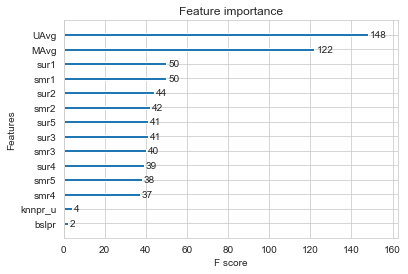

In [132]:
xgb.plot_importance(xgb_)
plt.show()

<h3> 4.4.5 XGBoost with initial 13 features + Surprise Baseline predictor + KNNBaseline predictor </h3>

- - - First we will run XGBoost with predictions from both KNN's ( that uses User\_User and Item\_Item similarities along with our previous features.

 
- - - Then we will run XGBoost with just predictions form both knn models and preditions from our baseline model. 

<h4> 4.4.4.2 Surprise KNNBaseline with movie movie similarities</h4>

In [133]:
# del few unwanted variables to free up ram
del results_bestknn_tr
del results_bestknn_te

In [ ]:
# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'sgd','learning_rate': .001 }
result_m = [] 
for s in [30,50,80,110]:
    for k in [20,40,80,100]:
        sim_options = {'user_based' : False,
                'name': 'pearson_baseline',
               'shrinkage': s,
               'min_support': 2
              }
        # we specify , how to compute similarities and what to consider with sim_options to our algorithm
        bsl_algo = KNNBaseline(k,sim_options = sim_options,bsl_options=bsl_options)
        # run this algorithm.., It will return the train and test results..
        bsl_train_results,bsl_test_results = run_surprise(bsl_algo,trainset,testset,verbose=True)
        result_m.append((s,k,bsl_train_results,bsl_test_results))
#         # Just store these error metrics in our models_evaluation datastructure
#         models_evaluation_train['bsl_algo'] = bsl_train_results 
#         models_evaluation_test['bsl_algo'] = bsl_test_results

In [502]:
# with open('knnresult_m.pkl','wb') as f:
#         pickle.dump([result_m],f)

In [134]:
 result_m = pickle.load(open('knnresult_m.pkl','rb'))

In [135]:
from operator import itemgetter
result_m = result_m[0]
test_values = list(map(itemgetter(3),result_m))
results_bestknn_tr_m = result_m[np.argmin(map(itemgetter(1),test_values))][2]['predictions']
results_bestknn_te_m = result_m[np.argmin(map(itemgetter(1),test_values))][3]['predictions']

In [136]:
# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_m'] = result_m[np.argmin(map(itemgetter(1),test_values))][2] 
models_evaluation_test['knn_m'] = result_m[np.argmin(map(itemgetter(1),test_values))][3]

__Updating Train Data__

In [137]:
train_sample_dataset['knnpr_m'] = results_bestknn_tr_m
train_sample_dataset.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knnpr_u,knnpr_m
0,233949.0,10.0,3.587581,4.0,4.0,5.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,2.692308,3.611111,3.0,3.209933,2.936268,2.988761
1,555770.0,10.0,3.587581,4.0,5.0,4.0,4.0,5.0,4.0,2.0,5.0,4.0,4.0,3.795455,3.611111,4.0,3.488397,2.295150,2.617405
2,767518.0,10.0,3.587581,2.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0,4.0,3.0,3.884615,3.611111,5.0,3.403899,2.847004,3.109506
3,894393.0,10.0,3.587581,3.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.000000,3.611111,4.0,3.133889,2.965204,2.964754


__Updating Test Data__

In [138]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['knnpr_m']  = results_bestknn_te_m

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knnpr_u,knnpr_m
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,5,3.584119,3.584119,3.584119
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,4,3.584119,3.584119,3.584119


#### Hyperparameter tuning KNNBaseline with movie-movie similarities

In [139]:
## prepare train data and test data
x_train = train_sample_dataset.drop(['user','movie','rating'],axis=1)
x_test = reg_test_df.drop(['user','movie','rating'],axis=1)

## prepare y_train and y_test
y_train = train_sample_dataset['rating']
y_test = reg_test_df['rating']

In [140]:


## https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
params = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
params_tune_results=[]
cnt=0

if not os.path.isfile('13&bsl&knn_um_features.pkl'):
    for min_child_weight in params['min_child_weight'] :
        for gamma in params['gamma'] :
            for subsample in params['subsample']:
                for colsample_bytree in params['colsample_bytree']:
                    for max_depth in params['max_depth']:

                        strt = datetime.now()
                        ## initialize xgboost
                        xgb_ = xgb.XGBRegressor(silent=False,n_jobs=-1,random_state=15,nthread=-1,
                                               min_child_weight=min_child_weight,
                                               gamma=gamma,subsample=subsample,colsample_bytree=colsample_bytree,
                                               max_depth=max_depth)
                        train_results, test_results = run_xgboost(xgb_, x_train,x_test, y_train, y_test)

                        # store the results in models_evaluations dictionaries
                        models_evaluation_train['first_algo'] = train_results
                        models_evaluation_test['first_algo'] = test_results
                        cnt+=1
                        params_tune_results.append((min_child_weight,gamma,subsample,colsample_bytree,max_depth,
                                                    (models_evaluation_train['first_algo']['mape'],models_evaluation_train['first_algo']['rmse']),
                                                    (models_evaluation_test['first_algo']['mape'],models_evaluation_test['first_algo']['rmse'])))
                        print('End of combination{} of params training with train mape:'.format(cnt),
                                              models_evaluation_train['first_algo']['mape'],' ',
                                              'test mape',models_evaluation_test['first_algo']['mape'])
    with open('13&bsl&knn_um_features.pkl','wb') as f:
        pickle.dump([params_tune_results],f)
else:
    params_tune_results = pickle.load(open('13&bsl&knn_um_features.pkl','rb'))

In [141]:
### finding the best params with least rmse 
params_knn_m = params_tune_results[0]
all_mape = [mape[1] for mape in  np.array(params_knn_m)[:,6]]
sorted_idx = np.argsort(all_mape)

In [142]:
best_t_knn_m = {}
best_t_knn_m['min_child_weight'] =  params_knn_m[sorted_idx[0]][0]
best_t_knn_m['gamma'] =  params_knn_m[sorted_idx[0]][1]
best_t_knn_m['subsample'] =  params_knn_m[sorted_idx[0]][2]
best_t_knn_m['colsample_bytree'] =  params_knn_m[sorted_idx[0]][3]
best_t_knn_m['max_depth'] =  params_knn_m[sorted_idx[0]][4]

### Training with best hyperparameter 

In [143]:
xgb_ = xgb.XGBRegressor(silent=False,n_jobs=-1,random_state=15,nthread=-1,
                        min_child_weight=best_t_knn_m['min_child_weight'],
                        gamma=best_t_knn_m['gamma'],
                        subsample=best_t_knn_m['subsample'],
                        colsample_bytree=best_t_knn_m['colsample_bytree'],
                        max_depth=best_t_knn_m['max_depth'])

In [144]:
train_results, test_results = run_xgboost(xgb_,x_train,x_test,y_train,y_test,True)   

[16:20:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to train the model----  0:00:14.045869

TEST DATA
------------------------------
RMSE :  1.0730818396811015
MAPE :  35.036778652299226


In [145]:
# store the results in models_evaluations dictionaries
models_evaluation_train['XG_bsl_knn_um'] = train_results
models_evaluation_test['XG_bsl_knn_um'] = test_results

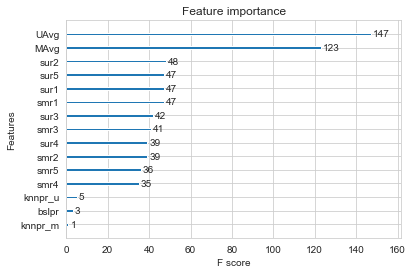

In [147]:
xgb.plot_importance(xgb_)
plt.show()

<h3> 4.4.6 Matrix Factorization Techniques </h3>

<h4> 4.4.6.1 SVD Matrix Factorization User Movie intractions </h4>

In [148]:
from surprise import SVD

http://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD 

- __ Predicted Rating : __
    - 
    - $ \large  \hat r_{ui} = \mu + b_u + b_i + q_i^Tp_u $
    
        - $\pmb q_i$ - Representation of item(movie) in latent factor space
        
        - $\pmb p_u$ - Representation of user in new latent factor space
        


- A BASIC MATRIX FACTORIZATION MODEL in  https://datajobs.com/data-science-repo/Recommender-Systems-[Netflix].pdf

- __Optimization problem with user item interactions and regularization (to avoid overfitting)__
    - 
    - $\large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2\right) $

In [149]:
# initiallize the model
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svd'] = svd_train_results 
models_evaluation_test['svd'] = svd_test_results

Training the models.....
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Done !! Time taken is  0:00:46.865982
Evaluating model on train data
time taken : 0:00:07.596753
---------------
Train Data
---------------
RMSE : 0.6723306040947559

MAPE : 20.001369995088865

Evaluating model on test data
time taken : 0:00:00.231667
---------------
Test Data
---------------
RMSE : 1.0653609238052149

MAPE : 34.293656737107135



  <h4> 4.4.6.2 SVD Matrix Factorization with implicit feedback from user ( user rated movies ) </h4>

In [150]:
from surprise import SVDpp

- ----->  2.5 Implicit Feedback in http://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf

- __ Predicted Rating : __
    - 
    - $ \large \hat{r}_{ui} = \mu + b_u + b_i + q_i^T\left(p_u +
    |I_u|^{-\frac{1}{2}} \sum_{j \in I_u}y_j\right) $ 

 - $ \pmb{I_u}$ --- the set of all items rated by user u

- $\pmb{y_j}$ --- Our new set of item factors that capture implicit ratings.  

- __Optimization problem with user item interactions and regularization (to avoid overfitting)__
    - 
    - $ \large \sum_{r_{ui} \in R_{train}} \left(r_{ui} - \hat{r}_{ui} \right)^2 +
\lambda\left(b_i^2 + b_u^2 + ||q_i||^2 + ||p_u||^2 + ||y_j||^2\right) $ 

In [151]:
# initiallize the model
svdpp = SVDpp(n_factors=50, random_state=15, verbose=True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svdpp'] = svdpp_train_results 
models_evaluation_test['svdpp'] = svdpp_test_results


Training the models.....
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Done !! Time taken is  0:30:04.161708
Evaluating model on train data
time taken : 0:01:13.755003
---------------
Train Data
---------------
RMSE : 0.6625160615119196

MAPE : 19.1982972325269

Evaluating model on test data
time taken : 0:00:00.237606
---------------
Test Data
---------------
RMSE : 1.0666641138068709

MAPE : 34.14350375733108



<h3> 4.4.7 XgBoost with 13 features + Surprise Baseline + Surprise KNNbaseline + MF Techniques </h3>

__Preparing Train data__

In [152]:
# add the predicted values from both knns to this dataframe
train_sample_dataset['svd'] = models_evaluation_train['svd']['predictions']
train_sample_dataset['svdpp'] = models_evaluation_train['svdpp']['predictions']

train_sample_dataset.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knnpr_u,knnpr_m,svd,svdpp
0,233949.0,10.0,3.587581,4.0,4.0,5.0,1.0,3.0,2.0,3.0,...,3.0,3.0,2.692308,3.611111,3.0,3.209933,2.936268,2.988761,2.894997,3.076286
1,555770.0,10.0,3.587581,4.0,5.0,4.0,4.0,5.0,4.0,2.0,...,4.0,4.0,3.795455,3.611111,4.0,3.488397,2.295150,2.617405,3.100869,2.887767


__Preparing Test data  __

In [153]:
reg_test_df['svd'] = models_evaluation_test['svd']['predictions']
reg_test_df['svdpp'] = models_evaluation_test['svdpp']['predictions']

reg_test_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knnpr_u,knnpr_m,svd,svdpp
0,808635,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,...,3.581679,3.581679,3.581679,3.581679,5,3.584119,3.584119,3.584119,3.584119,3.584119
1,941866,71,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,3.581679,...,3.581679,3.581679,3.581679,3.581679,4,3.584119,3.584119,3.584119,3.584119,3.584119


In [154]:
# prepare x_train and y_train
x_train = train_sample_dataset.drop(['user', 'movie', 'rating',], axis=1)
y_train = train_sample_dataset['rating']

# prepare test data
x_test = reg_test_df.drop(['user', 'movie', 'rating'], axis=1)
y_test = reg_test_df['rating']

#### Hyperparameter tuning SVD&SVD++

In [155]:


## https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
params = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
params_tune_results=[]
cnt=0

if not os.path.isfile('13&bsl&knn_um_mf_features.pkl'):
    for min_child_weight in params['min_child_weight'] :
        for gamma in params['gamma'] :
            for subsample in params['subsample']:
                for colsample_bytree in params['colsample_bytree']:
                    for max_depth in params['max_depth']:

                        strt = datetime.now()
                        ## initialize xgboost
                        xgb_ = xgb.XGBRegressor(silent=False,n_jobs=-1,random_state=15,nthread=-1,
                                               min_child_weight=min_child_weight,
                                               gamma=gamma,subsample=subsample,colsample_bytree=colsample_bytree,
                                               max_depth=max_depth)
                        train_results, test_results = run_xgboost(xgb_, x_train,x_test, y_train, y_test)

                        # store the results in models_evaluations dictionaries
                        models_evaluation_train['first_algo'] = train_results
                        models_evaluation_test['first_algo'] = test_results
                        cnt+=1
                        params_tune_results.append((min_child_weight,gamma,subsample,colsample_bytree,max_depth,
                                                    (models_evaluation_train['first_algo']['mape'],models_evaluation_train['first_algo']['rmse']),
                                                    (models_evaluation_test['first_algo']['mape'],models_evaluation_test['first_algo']['rmse'])))
                        print('End of combination{} of params training with train mape:'.format(cnt),
                                              models_evaluation_train['first_algo']['mape'],' ',
                                              'test mape',models_evaluation_test['first_algo']['mape'])
    with open('13&bsl&knn_um_mf_features.pkl','wb') as f:
        pickle.dump([params_tune_results],f)
else:
    params_tune_results = pickle.load(open('13&bsl&knn_um_mf_features.pkl','rb'))



In [156]:
### finding the best params with least rmse 
params_knn_mf = params_tune_results[0]
all_mape = [mape[1] for mape in  np.array(params_knn_mf)[:,6]]
sorted_idx = np.argsort(all_mape)

In [157]:
best_t_knn_mf = {}
best_t_knn_mf['min_child_weight'] =  params_knn_mf[sorted_idx[0]][0]
best_t_knn_mf['gamma'] =  params_knn_mf[sorted_idx[0]][1]
best_t_knn_mf['subsample'] =  params_knn_mf[sorted_idx[0]][2]
best_t_knn_mf['colsample_bytree'] =  params_knn_mf[sorted_idx[0]][3]
best_t_knn_mf['max_depth'] =  params_knn_mf[sorted_idx[0]][4]

### Training with best hyperparameter 

In [158]:
xgb_ = xgb.XGBRegressor(silent=False,n_jobs=-1,random_state=15,nthread=-1,
                        min_child_weight=best_t_knn_mf['min_child_weight'],
                        gamma=best_t_knn_mf['gamma'],
                        subsample=best_t_knn_mf['subsample'],
                        colsample_bytree=best_t_knn_mf['colsample_bytree'],
                        max_depth=best_t_knn_mf['max_depth'])

In [159]:
train_results, test_results = run_xgboost(xgb_,x_train,x_test,y_train,y_test,True)   

[16:53:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to train the model----  0:00:20.360060

TEST DATA
------------------------------
RMSE :  1.0732169905149365
MAPE :  34.9195053419295


In [160]:
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_final'] = train_results
models_evaluation_test['xgb_final'] = test_results

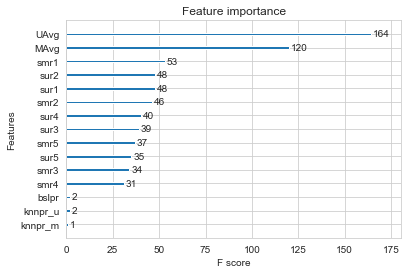

In [162]:
xgb.plot_importance(xgb_)
plt.show()

<h3> 4.4.8 XgBoost with Surpise Baseline + Surprise KNNbaseline + MF Techniques </h3>

In [163]:
# prepare train data
x_train = train_sample_dataset[['knnpr_u', 'knnpr_m', 'svd', 'svdpp']]
y_train = train_sample_dataset['rating']

# test data
x_test = reg_test_df[['knnpr_u', 'knnpr_m', 'svd', 'svdpp']]
y_test = reg_test_df['rating']



#### Hyperparameter tuning Baseline + Surprise KNNbaseline + MF Techniques 

In [ ]:
## https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost
params = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
params_tune_results=[]
cnt=0

if not os.path.isfile('surprise_all.pkl'):
    for min_child_weight in params['min_child_weight'] :
        for gamma in params['gamma'] :
            for subsample in params['subsample']:
                for colsample_bytree in params['colsample_bytree']:
                    for max_depth in params['max_depth']:

                        strt = datetime.now()
                        ## initialize xgboost
                        xgb_ = xgb.XGBRegressor(silent=False,n_jobs=-1,random_state=15,nthread=-1,
                                               min_child_weight=min_child_weight,
                                               gamma=gamma,subsample=subsample,colsample_bytree=colsample_bytree,
                                               max_depth=max_depth)
                        train_results, test_results = run_xgboost(xgb_, x_train,x_test, y_train, y_test)

                        # store the results in models_evaluations dictionaries
                        models_evaluation_train['first_algo'] = train_results
                        models_evaluation_test['first_algo'] = test_results
                        cnt+=1
                        params_tune_results.append((min_child_weight,gamma,subsample,colsample_bytree,max_depth,
                                                    (models_evaluation_train['first_algo']['mape'],models_evaluation_train['first_algo']['rmse']),
                                                    (models_evaluation_test['first_algo']['mape'],models_evaluation_test['first_algo']['rmse'])))
                        print('End of combination{} of params training with train mape:'.format(cnt),
                                              models_evaluation_train['first_algo']['mape'],' ',
                                              'test mape',models_evaluation_test['first_algo']['mape'])
    with open('surprise_all.pkl','wb') as f:
        pickle.dump([params_tune_results],f)
else:
    params_tune_results = pickle.load(open('surprise_all.pkl','rb'))



In [164]:
params_tune_results = pickle.load(open('surprise_all.pkl','rb'))

In [165]:
### finding the best params with least rmse 
params_all = params_tune_results
all_mape = [mape[1] for mape in  np.array(params_all)[:,6]]
sorted_idx = np.argsort(all_mape)

In [166]:
best_all = {}
best_all['min_child_weight'] =  params_knn_mf[sorted_idx[0]][0]
best_all['gamma'] =  params_knn_mf[sorted_idx[0]][1]
best_all['subsample'] =  params_knn_mf[sorted_idx[0]][2]
best_all['colsample_bytree'] =  params_knn_mf[sorted_idx[0]][3]
best_all['max_depth'] =  params_knn_mf[sorted_idx[0]][4]

### Training with best hyperparameter 

In [167]:
xgb_ = xgb.XGBRegressor(silent=False,n_jobs=-1,random_state=15,nthread=-1,
                        min_child_weight=best_all['min_child_weight'],
                        gamma=best_all['gamma'],
                        subsample=best_all['subsample'],
                        colsample_bytree=best_all['colsample_bytree'],
                        max_depth=best_all['max_depth'])

In [168]:
train_results, test_results = run_xgboost(xgb_,x_train,x_test,y_train,y_test,True)   

[16:54:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Time taken to train the model----  0:00:11.483013

TEST DATA
------------------------------
RMSE :  1.0750661549158458
MAPE :  35.16773884315635


In [169]:
# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_all_models'] = train_results
models_evaluation_test['xgb_all_models'] = test_results

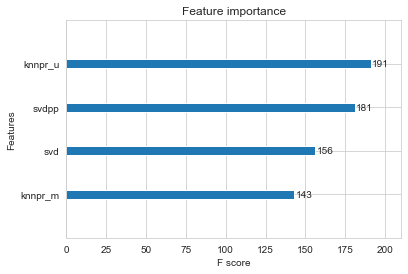

In [171]:
xgb.plot_importance(xgb_)
plt.show()

<h2> 4.5 Comparision between all models </h2>

In [172]:
# Saving our TEST_RESULTS into a dataframe so that you don't have to run it again
pd.DataFrame(models_evaluation_test).to_csv('small_sample_results.csv')
pd.DataFrame(models_evaluation_train).to_csv('small_sample_results_tr.csv')
models_tr = pd.read_csv('small_sample_results_tr.csv', index_col=0)
models_tr.loc['rmse'].sort_values()
models_te = pd.read_csv('small_sample_results.csv', index_col=0)
models_te.loc['rmse'].sort_values()
print("-"*100)
print("Total time taken to run this entire notebook ( with saved files) is :",datetime.now()-globalstart)

----------------------------------------------------------------------------------------------------
Total time taken to run this entire notebook ( with saved files) is : 0:58:18.796218


In [173]:
## lets plot the  test rmse of all models
models_tr.loc['rmse'].sort_values()

knn_u             0.4338182075362676
knn_m             0.5065166465394859
svdpp             0.6625160615119196
svd               0.6723306040947559
XG_bsl_knn_um     0.8603114170831101
XG_bsl_knn_u      0.8604245470286035
xgb_final         0.8606506755251391
XG_13_bslalgo     0.8609206769685083
13features        0.8611909988098058
bsl_algo           0.921382695993438
xgb_all_models    1.0813186704834223
Name: rmse, dtype: object

In [174]:
## lets plot the  test rmse of all models
models_te.loc['rmse'].sort_values()

svd               1.0653609238052149
knn_u             1.0657172164527722
bsl_algo          1.0658752960527853
knn_m             1.0661859431392178
svdpp             1.0666641138068709
13features        1.0730293103937931
XG_bsl_knn_um     1.0730818396811015
XG_bsl_knn_u       1.073121430168358
XG_13_bslalgo     1.0731231800139753
xgb_final         1.0732169905149365
xgb_all_models    1.0750661549158458
Name: rmse, dtype: object

### Plot the train and test RMSE

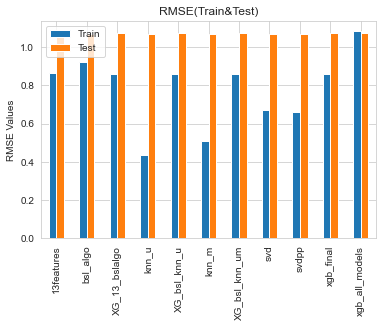

In [175]:
train_performance = pd.DataFrame(models_evaluation_train)
test_performance = pd.DataFrame(models_evaluation_test)
performance_dataframe = pd.DataFrame({'Train':train_performance.loc["rmse"],'Test':test_performance.loc["rmse"]})
performance_dataframe.plot(kind = "bar",grid = True)
plt.title("RMSE(Train&Test)")
plt.ylabel("RMSE Values")
plt.show()

In [190]:
### Pretty table 
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model Name","Train RMSE","Test RMSE"]
for name,tr_err,te_err in list(zip(models_te.columns,models_tr.loc['rmse'].values,models_te.loc['rmse'].values)):
    x.add_row([name,tr_err,te_err])
print(x)    

+----------------+--------------------+--------------------+
|   Model Name   |     Train RMSE     |     Test RMSE      |
+----------------+--------------------+--------------------+
|   13features   | 0.8611909988098058 | 1.0730293103937931 |
|    bsl_algo    | 0.921382695993438  | 1.0658752960527853 |
| XG_13_bslalgo  | 0.8609206769685083 | 1.0731231800139753 |
|     knn_u      | 0.4338182075362676 | 1.0657172164527722 |
|  XG_bsl_knn_u  | 0.8604245470286035 | 1.073121430168358  |
|     knn_m      | 0.5065166465394859 | 1.0661859431392178 |
| XG_bsl_knn_um  | 0.8603114170831101 | 1.0730818396811015 |
|      svd       | 0.6723306040947559 | 1.0653609238052149 |
|     svdpp      | 0.6625160615119196 | 1.0666641138068709 |
|   xgb_final    | 0.8606506755251391 | 1.0732169905149365 |
| xgb_all_models | 1.0813186704834223 | 1.0750661549158458 |
+----------------+--------------------+--------------------+


## Conclusion :
    * Netflix is one of the very systems that aims at linking its user to movies of their choice.
    
    * Using their cinematch recommendation system netflix suggests relevent movies to its users.
    
    * Netflix price challenge was introduced with a notion to reduce the cinmatch prediction error by 10% atleast.
    
    * Let's walk through  step by step procedure how we approached this case study t create a movie recommendation system.
        -> We took the dataset with information of userid,movie,rating and date .
        -> There are total of 100480507 (approx 10 cr) ratings for different movies rated by 480189 unique users for 
           17770 unique movies.
        -> * We split the data into train and test at 80:20 and perform EDA on train.
    With Some exploratory data analysis we found few observations
        * Maximum movies were given the rating of 4 
        * Most users rated movies on Monday,Wednesday and Tuesday, however average ratings remained the same per day.
        * We could see high number of movies rated during june and July .Many movie releases during these months can be a 
        reason for this peak.
        * Average movie ratings by users  lies between  3.5-4 and  average movie rating lies between 3.5 - 4.
        * We also noticed 5% of movies (which are very popular) are given very high number of ratings and vice versa with
        few users who have rated many movies
        
    * We tried computing user similarity using cosine similarity ,however due to the large amount of users, computing 
    cosine similarity might take approx 10 days hence we tried the dimensionality reduction approach 
    (TruncatedSVD)computing which also takes a lot of time as sparse vector is now converted to dense after reducing 
    dimensions to withhold the variance .
    
    * We proceded to compute the user similarity during run time and storing the similarity values of users then and there.
    
    * We also computed movie similarities,which takes less time as there are just 17k movies.
    
    * We randomly sampled 25k users and 3k movies , store it in sparse matrix and  train our models.
    
    * Sparse matrix is preferred to save memory and reducing computing time as we are omitting the zero valued elements.
    
    * We used parallel processing techniques to  create our dataset containing 13 features (Global average,user 
      average,movie average, (top 5 similar users),(top 5 similar movies)) in less time by using 6 cores.
      Ref of code : from Microsoft malware assignment 
    
    *We then went forth to train our machine learning models and improve its performance .Let's see how!!
        - Trained our XGBoost model with 13 features.
        - Using surprise library ,using baseline algorithm we predicted user rating.
        - Then,added baseline predictions to our data and trained XGBoost(13 features + Baseline predictions)
        - Using surprise KNN algorithm using user_user similarities we predicted rating.
        -  Now we added (13features + Baseline predictions + Knn_user predictions) and trained XGBoost.
        - Similarly we went forth using more recommendation algorithms from the surprise library (Knn item_item , matrix 
        factorization techniques like SVD and SVD++) kept adding the predictions to our dataset to improve the model 
        performace.
        
    * After  addition of new preictions to our dataset we also permofmed hyper parameter tuning for each of these XGBoost 
    models and  trained these models with the best paramter combination.
    
    * Plotted feature importances of each model and observed that importance of user average and movie average value is way
    higher than the other features.
    
    * Features from surprise library holds much  lesser importance (with values less than 5) than the other 13 
    features(with values greater than 30). 
    
    * Then we created dataset with only surprise predcitions 
    (i.e Baseline,Knn_user_user,Knn_item_item,SVD,SVD++)  and trained XGBoost.

    * We could see that the Surpise SVD algorithm gives the least error ( RMSE : 1.06) on test data.
    
    * On Train data surprise Knn_user_user performed the best
    with RMSE 0.43, also this algorithm showed highest overfit wih train rmse 0.43 and test rmse 1.06.

    *Taking into the account of overfitting , we found XGB model trained with just surprise predictions was least overfit
    with train and test RMSE being close(1.08,1.07) .

In [193]:
## additional file : multithread.py (having almost same code as in this notebook for parallel processing) 
## has been used  to create our dataset with intial 13 features.

## Our best model considering performance on test is SVD with RMSE 1.06.
## Considering the overfitting factor we  say best model is xgb_all_models with  test RMSE ( 1.07)